In [45]:
import pandas as pd
import numpy as np

import sys
import re
import os
project_path = os.getcwd()

# 建模

## 读入数据

In [968]:
df_model =pd.read_excel(project_path +'/data/df_修改剂量_model_data_forward.xlsx')
if 'Unnamed: 0' in df_model.columns:
    df_model = df_model.drop(['Unnamed: 0'], axis=1)

In [969]:
# 人工筛选
df_model=df_model.drop(['天门冬氨酸氨基转移酶','BMI','凝血酶原活动度','低密度脂蛋白胆固醇'],axis=1)

In [970]:
df_model.shape

(150, 13)

In [971]:
# 查看共线性
df_model.corr()

,target_日剂量,体重,钙离子阻抗剂,日剂量,age,糖尿病,直接胆红素,尿素,淋巴细胞百分数,高血压,糖皮质激素,gender,test_result
target_日剂量,1.000000,0.406125,0.122626,0.852460,0.311874,0.215716,0.188720,0.148662,-0.311254,0.446752,0.170982,-0.240417,0.160987
体重,0.406125,1.000000,0.016961,0.326819,0.700038,0.507381,0.093156,0.106786,-0.277779,0.356935,-0.068833,-0.020113,-0.242395
钙离子阻抗剂,0.122626,0.016961,1.000000,0.220150,0.238927,0.273788,0.446069,0.439105,-0.463232,0.217627,-0.040742,0.242626,0.326212
日剂量,0.852460,0.326819,0.220150,1.000000,0.275960,0.241539,0.147211,0.282642,-0.387865,0.351254,0.152389,-0.162103,0.251369
age,0.311874,0.700038,0.238927,0.275960,1.000000,0.536303,0.210246,0.250913,-0.384555,0.458320,-0.095430,0.035901,-0.203059
糖尿病,0.215716,0.507381,0.273788,0.241539,0.536303,1.000000,0.093484,0.221838,-0.155613,0.318642,-0.175388,0.386043,-0.147102
直接胆红素,0.188720,0.093156,0.446069,0.147211,0.210246,0.093484,1.000000,0.036063,-0.342299,0.120604,-0.126107,0.025799,0.462499
尿素,0.148662,0.106786,0.439105,0.282642,0.250913,0.221838,0.036063,1.000000,-0.296160,0.321742,0.030237,0.048573,0.079505
淋巴细胞百分数,-0.311254,-0.277779,-0.463232,-0.387865,-0.384555,-0.155613,-0.342299,-0.296160,1.000000,-0.174608,-0.108789,-0.006995,-0.211439
高血压,0.446752,0.356935,0.217627,0.351254,0.458320,0.318642,0.120604,0.321742,-0.174608,1.000000,0.022276,-0.238962,0.034249


In [972]:
df_model.corr()[df_model.corr()>0.5].to_excel(project_path+'/data/修改剂量_corr.xlsx')

In [973]:
df_model['target_日剂量'].value_counts()

2.0    32
3.0    21
1.0    21
1.5    19
4.0    17
2.5    11
0.5     8
5.0     8
4.5     3
5.5     2
6.0     2
3.5     2
4.2     1
1.8     1
1.2     1
3.2     1
Name: target_日剂量, dtype: int64

In [974]:
# df_model['target_日剂量']=df_model['target_日剂量'].astype('str')
# df_model=df_model[df_model['target_日剂量'].str.contains('1.0|1.5|2.0|2.5|3.0|4.0')]
# df_model['target_日剂量']=df_model['target_日剂量'].astype('float')
# print(df_model.target_日剂量.value_counts())

2.0    32
3.0    21
1.0    21
1.5    19
4.0    17
2.5    11
Name: target_日剂量, dtype: int64


In [975]:
# 抽取分类数据
# 把少数样本
df_model['target_日剂量']=df_model['target_日剂量'].apply(lambda x: 0 if round(float(x),1)==1 else
                                                                1 if round(float(x),1)==1.5 else
                                                                2 if round(float(x),1)==2 else
                                                                3 if round(float(x),1)==2.5 else
                                                                4 if round(float(x),1)==3 else
                                                                5 if round(float(x),1)==4 else 6)
# 提取分类数据
df_model['target_日剂量']=df_model['target_日剂量'].astype('str')
df_model=df_model[df_model['target_日剂量'].str.contains('0|1|2|3|4|5')]
df_model['target_日剂量']=df_model['target_日剂量'].astype('float')
print(df_model.target_日剂量.value_counts())

In [976]:
df_model.head()

,target_日剂量,体重,钙离子阻抗剂,日剂量,age,糖尿病,直接胆红素,尿素,淋巴细胞百分数,高血压,糖皮质激素,gender,test_result
0,2.0,117.6,0,1.0,26,0,1.4,7.9,49.7,1,0,1,12.5
1,2.5,49.2,0,2.5,26,0,0.8,12.3,29.7,0,1,0,2.0
3,1.0,NaN,1,1.0,66,1,2.0,8.7,8.2,1,1,1,2.0
4,4.0,NaN,1,2.0,43,0,1.8,18.9,5.0,1,1,1,2.4
5,2.0,23.0,1,2.0,13,0,NaN,NaN,8.8,0,1,1,15.7


In [977]:
df_model.shape

(121, 13)

In [978]:
df_model.columns

Index(['target_日剂量', '体重', '钙离子阻抗剂', '日剂量', 'age', '糖尿病', '直接胆红素', '尿素',
       '淋巴细胞百分数', '高血压', '糖皮质激素', 'gender', 'test_result'],
      dtype='object')

In [979]:
discrete_col=['钙离子阻抗剂','糖尿病','高血压','糖皮质激素','gender']
continuous_col=[x for x in df_model.columns if x not in discrete_col]
continuous_col.remove('target_日剂量')

## 数据归一化

In [980]:
# 防止不同维特征数据差距过大，影响建模效果
max_list=[]
for i in continuous_col:
    max_value = df_model[i].max()
    max_list.append(max_value)
    df_model[i]=df_model[i].apply(lambda x: round(x/max_value,3))

In [981]:
df_model.columns

Index(['target_日剂量', '体重', '钙离子阻抗剂', '日剂量', 'age', '糖尿病', '直接胆红素', '尿素',
       '淋巴细胞百分数', '高血压', '糖皮质激素', 'gender', 'test_result'],
      dtype='object')

In [983]:
df_max_value=pd.DataFrame(data={'features':continuous_col,
                               'max_value':max_list})

In [984]:
df_max_value

,features,max_value
0,体重,117.6
1,日剂量,6.0
2,age,73.0
3,直接胆红素,8.8
4,尿素,36.1
5,淋巴细胞百分数,71.8
6,test_result,30.0


In [ ]:
# # 连续变量归一化处理
# age=round(age/73,3)
# weight=round(weight/117.6,3)
# last_dosage=round(last_dosage/6,3)
# last_tdm=round(last_tdm/30,3)
# direct_bilirubin=round(direct_bilirubin/8.8,3)
# urea=round(urea/36.1,3)
# lymphocyte_ratio=round(lymphocyte_ratio/71.8)

In [985]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 149
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target_日剂量   121 non-null    float64
 1   体重           117 non-null    float64
 2   钙离子阻抗剂       121 non-null    int64  
 3   日剂量          121 non-null    float64
 4   age          121 non-null    float64
 5   糖尿病          121 non-null    int64  
 6   直接胆红素        114 non-null    float64
 7   尿素           116 non-null    float64
 8   淋巴细胞百分数      113 non-null    float64
 9   高血压          121 non-null    int64  
 10  糖皮质激素        121 non-null    int64  
 11  gender       121 non-null    int64  
 12  test_result  121 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 13.2 KB


## 插补数据

In [836]:
# 使用随机森林对缺失值进行插补
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
def missing_value_interpolation(df):
    df = df.reset_index(drop=True)
    # 提取存在缺失值的列名
    missing_list = []
    for i in df.columns:
        if df[i].isnull().sum()>0:
            missing_list.append(i)
    missing_list_copy = missing_list.copy()
    # 用该列未缺失的值训练随机森林，然后用训练好的rf预测缺失值
    for i in range(len(missing_list)):
        name=missing_list[0]
        df_missing = df[missing_list_copy]
        # 将其他列的缺失值用0表示。
        missing_list.remove(name)
        for j in missing_list:
            df_missing[j]=df_missing[j].astype('str').apply(lambda x: 0 if x=='nan' else x)
        df_missing_is = df_missing[df_missing[name].isnull()]
        df_missing_not = df_missing[df_missing[name].notnull()]
        y = df_missing_not[name]
        x = df_missing_not.drop([name],axis=1)

        rfr = RandomForestRegressor(n_estimators=300,
                                    random_state=3)
        rfr.fit(x, y)
        #预测缺失值
        predict = rfr.predict(df_missing_is.drop([name],axis=1))
        #填补缺失值
        df.loc[df[name].isnull(),name] = predict
    return df

In [837]:
# 插补建模数据
df_model_cb=missing_value_interpolation(df_model)
# df_model_cb=df_model

In [838]:
df_model_cb.shape

(121, 13)

In [839]:
# 保存插补数据
df_model_cb.to_excel((project_path + '/data/df_model_data_插补.xlsx')

## 划分数据集

### 计算随机数种子

In [65]:
from auto_ml.utils_models import load_ml_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,average_precision_score,precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

# 划分训练集和测试集，比例为8:2
x = df_model_cb.drop(['target_日剂量'],axis=1)
y = df_model_cb['target_日剂量']

seeds_list=[]
cat_f1_list=[]
for i in range(101):
    
    tran_x, test_x, tran_y, test_y = train_test_split(x, y, test_size=0.2, random_state=i)
    
    # 分类数据过采样
    from imblearn.over_sampling import SMOTE,ADASYN 
    sm = SMOTE(random_state=0)
    tran_x_sm,tran_y_sm = sm.fit_resample(tran_x,tran_y)
#     tran_x_sm,tran_y_sm=tran_x,tran_y
    
    import xgboost
    cat_model=xgboost.XGBClassifier(max_depth=5,
                        learning_rate=0.01,
                        n_estimators=500,
                        min_child_weight=0.5,
                        eta=0.1,
                        gamma=0.5,
                        reg_lambda=10,
                        subsample=0.5,
                        colsample_bytree=0.8,
                        nthread=4,
                        scale_pos_weight=1,
                        random_state=3)
    # 分类模型
    cat_model.fit(tran_x_sm,tran_y_sm)
    cat_predictions=cat_model.predict(test_x)
    cat_f1=f1_score(test_y,cat_predictions,average='macro')
    # 防止分类数据的测试集划分不平衡
    if not (3 >=(test_y.value_counts().values[0])/(test_y.value_counts().values[-1]) >=2):
        continue

#     import catboost
#     # CatBoost模型
#     cat_model=catboost.CatBoostRegressor(iterations=300, 
#                                           learning_rate=0.2, 
#                                           depth=6,
#                                           l2_leaf_reg=2,
#                                           subsample=1,
#                                           loss_function='RMSE', # 'CrossEntropy',
#                                           random_state=3)
#     # 回归模型
#     cat_model.fit(tran_x,tran_y)
#     cat_predictions=cat_model.predict(test_x)
#     cat_f1=r2_score(test_y,cat_predictions)
    
    seeds_list.append(i)
    cat_f1_list.append(cat_f1)

In [66]:
df_seeds=pd.DataFrame(data={'seed':seeds_list,
                           'cat_f1':cat_f1_list})
df_seeds=df_seeds.sort_values(['cat_f1'], ascending=0).reset_index(drop=True)
df_seeds.to_excel(project_path+'/data/df_seeds.xlsx')

In [67]:
df_seeds.loc[0,'seed']

88

### 划分数据集

In [290]:
# 分类随机数种子
from auto_ml.utils_models import load_ml_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
# 划分训练集和测试集，比例为8:2
x = df_model_cb.drop(['target_日剂量'],axis=1)
y = df_model_cb['target_日剂量']

seed_index=df_seeds.loc[0,'seed']
tran_x, test_x, tran_y, test_y = train_test_split(x, y, test_size=0.2, random_state=seed_index)

In [291]:
seed_index

88

In [209]:
df_model.shape

(121, 13)

In [328]:
print(tran_x.shape)
print(test_x.shape)

(96, 12)
(25, 12)


In [210]:
# 防止分类数据的测试集划分不平衡
if (test_y.value_counts().values[0])/(test_y.value_counts().values[-1]) <= 3:
    print('测试集划分不平衡')
    sys.exit()

# 防止分类数据的训练集划分不平衡
if (tran_y.value_counts().values[0])/(tran_y.value_counts().values[-1]) > 10:
    print('训练集划分可能不平衡')
    sys.exit()

测试集划分不平衡


SystemExit: 

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [211]:
tran_y.value_counts()

2.0    26
0.0    17
4.0    17
1.0    14
5.0    13
3.0     9
Name: target_日剂量, dtype: int64

In [212]:
test_y.value_counts()

2.0    6
1.0    5
5.0    4
4.0    4
0.0    4
3.0    2
Name: target_日剂量, dtype: int64

In [198]:
tran_x.head()

,体重,钙离子阻抗剂,日剂量,age,糖尿病,直接胆红素,尿素,淋巴细胞百分数,高血压,糖皮质激素,gender,test_result
43,0.144000,0,0.167,0.082,0,0.091,0.108,0.755,0,1,0,0.130
100,0.631000,0,0.500,0.795,1,0.205,0.141,0.301,1,1,1,0.127
2,0.401857,1,0.167,0.904,1,0.227,0.241,0.114,1,1,1,0.067
64,0.442000,0,0.083,0.479,0,0.193,0.078,0.389,0,1,0,0.073
68,0.509000,1,1.000,0.521,0,0.261,0.983,0.255,0,1,1,0.260


In [199]:
test_x.head()

,体重,钙离子阻抗剂,日剂量,age,糖尿病,直接胆红素,尿素,淋巴细胞百分数,高血压,糖皮质激素,gender,test_result
24,0.180,0,0.417,0.123,0,0.136,0.269,0.600,0,1,1,0.320
113,0.116,0,0.167,0.041,0,0.250,0.147,1.000,0,1,1,0.640
82,0.276,0,0.333,0.151,0,0.114,0.180,0.102,0,1,0,0.227
87,0.349,0,0.500,0.178,0,0.068,0.078,0.553,0,1,0,0.147
81,0.408,0,0.833,0.630,0,0.330,0.488,0.015,1,1,0,1.000


In [200]:
test_y

24     3.0
113    0.0
82     2.0
87     4.0
81     5.0
73     1.0
59     2.0
98     1.0
52     4.0
65     1.0
76     5.0
57     0.0
118    5.0
53     5.0
99     2.0
107    2.0
33     4.0
31     3.0
120    2.0
12     0.0
8      0.0
84     1.0
104    1.0
42     2.0
55     4.0
Name: target_日剂量, dtype: float64

In [201]:
type(test_y)

pandas.core.series.Series

## 训练集过采样

In [331]:
# 进行过采样
from imblearn.over_sampling import SMOTE,ADASYN 
from imblearn.combine import SMOTETomek
sm = SMOTE(random_state=0)
# sm=ADASYN(random_state=0)

tran_x_sm,tran_y_sm = sm.fit_resample(tran_x,tran_y)

In [332]:
tran_x_sm.shape

(156, 12)

In [333]:
tran_y_sm.value_counts()

2.0    26
3.0    26
5.0    26
0.0    26
4.0    26
1.0    26
Name: target_日剂量, dtype: int64

In [334]:
tran_x_sm.head()

,体重,钙离子阻抗剂,日剂量,age,糖尿病,直接胆红素,尿素,淋巴细胞百分数,高血压,糖皮质激素,gender,test_result
0,0.144000,0,0.167,0.082,0,0.091,0.108,0.755,0,1,0,0.130
1,0.631000,0,0.500,0.795,1,0.205,0.141,0.301,1,1,1,0.127
2,0.401857,1,0.167,0.904,1,0.227,0.241,0.114,1,1,1,0.067
3,0.442000,0,0.083,0.479,0,0.193,0.078,0.389,0,1,0,0.073
4,0.509000,1,1.000,0.521,0,0.261,0.983,0.255,0,1,1,0.260


In [335]:
tran_x_sm.to_excel(project_path+'/data/tran_x_sm.xlsx')
tran_y_sm.to_excel(project_path+'/data/tran_y_sm.xlsx')

## 多分类模型：5-fold cross validation

In [202]:
seed_index

88

In [488]:
from sklearn.model_selection import KFold

# 划分训练集和测试集，比例为8:2
x = df_model_cb.drop(['target_日剂量'],axis=1)
y = df_model_cb['target_日剂量']
# 五折交叉验证
kf = KFold(n_splits=5,random_state=seed_index,shuffle=True)

df_auc_accuracy=pd.DataFrame()
df_precision_f1=pd.DataFrame()
temp_importance_list=[]

for train_index, test_index in kf.split(x):

    tran_x,test_x,tran_y,test_y=x.values[train_index],x.values[test_index],y.values[train_index],y.values[test_index]

    tran_x_sm,tran_y_sm =tran_x,tran_y
    
    from sklearn.metrics import r2_score,average_precision_score,precision_recall_curve
    from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
    import xgboost
    # XGBoost模型
    xgb_model=xgboost.XGBClassifier(max_depth=5,
                            learning_rate=0.001,
                            n_estimators=500,
                            min_child_weight=0.5,
                            eta=0.1,
                            gamma=0.5,
                            reg_lambda=5,
                            subsample=0.8,
                            colsample_bytree=0.8,
                            nthread=4,
                            scale_pos_weight=1,
                            random_state=3)
    xgb_model.fit(tran_x_sm,tran_y_sm)
    xgb_predictions=xgb_model.predict(test_x)


    import lightgbm
    # LightGBM模型
    lgbm_model=lightgbm.LGBMClassifier(iterations=300, 
                                      max_depth=5,
                                      min_child_weight=0.5,
                                      gamma=0.5,
                                       reg_lambda=5,
                                      subsample=0.8,
                                      learning_rate=0.01, 
                                      loss_function='CrossEntropy',
                                      random_state=3)
    lgbm_model.fit(tran_x_sm,tran_y_sm)
    lgbm_predictions=lgbm_model.predict(test_x)


    import catboost
    # CatBoost模型
    cat_model=catboost.CatBoostClassifier(iterations=300, 
                                          learning_rate=0.2, 
                                          depth=6,
                                          l2_leaf_reg=2,
                                          loss_function='MultiClass',
                                          random_state=3)
    cat_model.fit(tran_x_sm,tran_y_sm)
    cat_predictions=cat_model.predict(test_x)
    
    # 随机森林
    from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
    from sklearn.model_selection import GridSearchCV
    # 列出参数列表
    tree_grid_parameter = {'n_estimators': list((10, 50, 100, 150, 200))}
    # 进行参数的搜索组合
    grid = GridSearchCV(RandomForestClassifier(), param_grid=tree_grid_parameter, cv=3)
    # 根据已有数据去拟合随机森林模型
    grid.fit(tran_x_sm, tran_y_sm)
    rf_model = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],
                                max_depth=8,
                                random_state=3)
    rf_model.fit(tran_x_sm, tran_y_sm)
    # 预测缺失值
    rf_predictions = rf_model.predict(test_x)


    # GBDT
    # 列出参数列表
    gbdt_model = GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.1,
                                max_depth=8,
                                subsample=0.4,
                                random_state=3)
    gbdt_model.fit(tran_x_sm,tran_y_sm)
    # 预测缺失值
    gbdt_predictions = gbdt_model.predict(test_x)


    # SVR
    from sklearn.svm import SVR,SVC
    # 回归模型
    # svr = SVR(kernel='linear', C=1.25)
    # 分类模型
    svr_model = SVC(kernel='rbf',
              C=50,
              cache_size=200,
                probability=True,
              random_state=3)
    svr_model.fit(tran_x_sm,tran_y_sm)
    svr_predictions=svr_model.predict(test_x)


    # Linear回归，Lasso回归，领回归，logistic回归
    from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
    lcv_model = LogisticRegression(penalty='l2',
                             C=5,
                            solver='lbfgs',
                             max_iter=100,
                            random_state=3)
    # lcv = Lasso()
    # lcv = Ridge()
    lcv_model.fit(tran_x_sm, tran_y_sm)
    lcv_predictions = lcv_model.predict(test_x)

    # ANN
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import classification_report,confusion_matrix

    ANN_model = MLPClassifier(alpha=0.1, 
                        hidden_layer_sizes=[100,], 
                        solver='adam', 
                        activation='relu', 
                        random_state=3)
    ANN_model.fit(tran_x_sm, tran_y_sm)
    ANN_predictions=ANN_model.predict(test_x)


    # TabNet
    from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
    from pytorch_tabnet.multitask import TabNetMultiTaskClassifier
    TabNet_model = TabNetMultiTaskClassifier(
                           cat_emb_dim=1,
                           optimizer_fn=torch.optim.Adam,
                           optimizer_params=dict(lr=2e-2),
                           scheduler_params={"step_size":50, # how to use learning rate scheduler
                                             "gamma":0.9},
                           scheduler_fn=torch.optim.lr_scheduler.StepLR,
                           mask_type='entmax') # "sparsemax"
    tran_x_x, tran_x_valid, tran_y_y, tran_y_valid = train_test_split(tran_x_sm, tran_y_sm, test_size=0.125, random_state=3)

    TabNet_model.fit(X_train=tran_x_sm, 
            y_train=tran_y_sm.reshape(-1,1),
            max_epochs=200, 
            patience=20,
            batch_size=128, 
            virtual_batch_size=16,
            num_workers=0,
            drop_last=False,
            loss_fn=[torch.nn.functional.cross_entropy]) # Optional, just an example of list usage
    TabNet_predictions=TabNet_model.predict(test_x)

    # 计算评价指标compute evaluation metrics
    from sklearn.metrics import classification_report,confusion_matrix
    # 统一模型输出结果
    df_model_result=pd.DataFrame(
        columns=['model','index','precision','recall','f1-score','support','accuracy','AUC','sensitivity','specificity'])

    model_list=[xgb_model,lgbm_model,cat_model,rf_model,gbdt_model,svr_model,lcv_model,ANN_model,TabNet_model]
    model_name_list=['XGBoost','LGBM','CatBoost','RF','GBDT','SVR','LR','ANN','TabNet']
    
    temp_auc=pd.DataFrame()    
    for model,name in zip(model_list,model_name_list):
        print(name)
        # 计算accuracy和AUC
        # tabnet predict_proba结果是三维数组，无法计算auc，需要reshape(-1,6),所有行 x 6列
        test_y_score=np.reshape(model.predict_proba(test_x),(-1,6))
        auc=roc_auc_score(test_y,test_y_score,multi_class='ovr')
        auc=round(auc,2)
        # tabnet predict结果是三维数组，无法计算auc，需要reshape
        predictions=np.reshape(model.predict(test_x),(-1,1)).astype(str)
        accuracy=accuracy_score(test_y.astype(str),predictions)
        accuracy=round(accuracy,2)
        # 计算precision、recall、F1
        precision=precision_score(test_y.astype(str),predictions,average='macro')
        precision=round(precision,2)
        recall=recall_score(test_y.astype(str),predictions,average='macro')
        recall=round(recall,2)
        f1=f1_score(test_y.astype(str),predictions,average='macro')
        f1=round(f1,2)
        temp_auc.loc[temp_auc.shape[0],['model','precision','recall','f1','accuracy','AUC']]=\
                                                                    [name,precision,recall,f1,accuracy,auc]
    df_auc_accuracy=pd.concat([df_auc_accuracy,temp_auc],axis=0)
                                       
    # 变量重要性评分
    importance = xgb_model.feature_importances_
    df_importance_temp=pd.DataFrame(data={'特征':x.columns,'重要性评分':importance})
    temp_importance_list.append(df_importance_temp)

0:	learn: 1.7299009	total: 2.23ms	remaining: 666ms
1:	learn: 1.6446758	total: 4.21ms	remaining: 628ms
2:	learn: 1.5612820	total: 5.76ms	remaining: 570ms
3:	learn: 1.4497512	total: 7.11ms	remaining: 526ms
4:	learn: 1.3932064	total: 8.43ms	remaining: 497ms
5:	learn: 1.3364981	total: 9.9ms	remaining: 485ms
6:	learn: 1.2649370	total: 11.3ms	remaining: 473ms
7:	learn: 1.2109278	total: 12.7ms	remaining: 463ms
8:	learn: 1.1554204	total: 14.3ms	remaining: 462ms
9:	learn: 1.0708919	total: 15.6ms	remaining: 453ms
10:	learn: 1.0366262	total: 17.1ms	remaining: 449ms
11:	learn: 0.9939558	total: 18.8ms	remaining: 451ms
12:	learn: 0.9518435	total: 20.2ms	remaining: 447ms
13:	learn: 0.9189843	total: 21.8ms	remaining: 446ms
14:	learn: 0.8856920	total: 23.3ms	remaining: 442ms
15:	learn: 0.8568351	total: 24.7ms	remaining: 438ms
16:	learn: 0.8243417	total: 26.1ms	remaining: 435ms
17:	learn: 0.7961487	total: 27.5ms	remaining: 431ms
18:	learn: 0.7728484	total: 28.9ms	remaining: 428ms
19:	learn: 0.7436981	to

237:	learn: 0.0420983	total: 321ms	remaining: 83.7ms
238:	learn: 0.0418655	total: 323ms	remaining: 82.4ms
239:	learn: 0.0416274	total: 324ms	remaining: 81ms
240:	learn: 0.0414663	total: 325ms	remaining: 79.6ms
241:	learn: 0.0412605	total: 326ms	remaining: 78.2ms
242:	learn: 0.0410523	total: 328ms	remaining: 76.8ms
243:	learn: 0.0408547	total: 329ms	remaining: 75.5ms
244:	learn: 0.0406175	total: 330ms	remaining: 74.1ms
245:	learn: 0.0403876	total: 331ms	remaining: 72.7ms
246:	learn: 0.0401726	total: 333ms	remaining: 71.4ms
247:	learn: 0.0399335	total: 334ms	remaining: 70ms
248:	learn: 0.0397747	total: 336ms	remaining: 68.8ms
249:	learn: 0.0395474	total: 338ms	remaining: 67.5ms
250:	learn: 0.0393874	total: 339ms	remaining: 66.2ms
251:	learn: 0.0392404	total: 340ms	remaining: 64.8ms
252:	learn: 0.0390473	total: 342ms	remaining: 63.6ms
253:	learn: 0.0388982	total: 344ms	remaining: 62.2ms
254:	learn: 0.0387858	total: 345ms	remaining: 60.8ms
255:	learn: 0.0385514	total: 346ms	remaining: 59.5

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 2.93349 |  0:00:00s
epoch 1  | loss: 2.58524 |  0:00:00s
epoch 2  | loss: 2.30359 |  0:00:00s
epoch 3  | loss: 2.17934 |  0:00:00s
epoch 4  | loss: 2.09228 |  0:00:00s
epoch 5  | loss: 1.99325 |  0:00:00s
epoch 6  | loss: 1.8398  |  0:00:00s
epoch 7  | loss: 1.74131 |  0:00:00s
epoch 8  | loss: 1.71613 |  0:00:00s
epoch 9  | loss: 1.65864 |  0:00:00s
epoch 10 | loss: 1.63126 |  0:00:00s
epoch 11 | loss: 1.6233  |  0:00:00s
epoch 12 | loss: 1.61753 |  0:00:00s
epoch 13 | loss: 1.54754 |  0:00:00s
epoch 14 | loss: 1.56937 |  0:00:00s
epoch 15 | loss: 1.5793  |  0:00:00s
epoch 16 | loss: 1.46855 |  0:00:00s
epoch 17 | loss: 1.39967 |  0:00:00s
epoch 18 | loss: 1.47166 |  0:00:00s
epoch 19 | loss: 1.50843 |  0:00:00s
epoch 20 | loss: 1.34379 |  0:00:00s
epoch 21 | loss: 1.43373 |  0:00:00s
epoch 22 | loss: 1.41167 |  0:00:00s
epoch 23 | loss: 1.35476 |  0:00:00s
epoch 24 | loss: 1.40

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0:	learn: 1.7067574	total: 2.35ms	remaining: 704ms
1:	learn: 1.6165142	total: 3.94ms	remaining: 587ms
2:	learn: 1.5372321	total: 5.66ms	remaining: 560ms
3:	learn: 1.4452959	total: 6.99ms	remaining: 517ms
4:	learn: 1.3525898	total: 8.62ms	remaining: 508ms
5:	learn: 1.3048233	total: 9.98ms	remaining: 489ms
6:	learn: 1.2330860	total: 11.5ms	remaining: 483ms
7:	learn: 1.1177716	total: 13.3ms	remaining: 486ms
8:	learn: 1.0519169	total: 14.8ms	remaining: 477ms
9:	learn: 0.9895915	total: 16.9ms	remaining: 492ms
10:	learn: 0.9594372	total: 18.4ms	remaining: 485ms
11:	learn: 0.9242484	total: 19.9ms	remaining: 477ms
12:	learn: 0.8807737	total: 21.2ms	remaining: 469ms
13:	learn: 0.8280625	total: 22.6ms	remaining: 461ms
14:	learn: 0.7932778	total: 24ms	remaining: 456ms
15:	learn: 0.7623595	total: 25.4ms	remaining: 451ms
16:	learn: 0.7295696	total: 27.1ms	remaining: 450ms
17:	learn: 0.7073179	total: 28.5ms	remaining: 447ms
18:	learn: 0.6889958	total: 30.4ms	remaining: 450ms
19:	learn: 0.6585074	to

228:	learn: 0.0375162	total: 318ms	remaining: 98.5ms
229:	learn: 0.0373078	total: 320ms	remaining: 97.3ms
230:	learn: 0.0370858	total: 321ms	remaining: 96ms
231:	learn: 0.0369170	total: 322ms	remaining: 94.5ms
232:	learn: 0.0367326	total: 324ms	remaining: 93.1ms
233:	learn: 0.0364771	total: 325ms	remaining: 91.7ms
234:	learn: 0.0362556	total: 326ms	remaining: 90.3ms
235:	learn: 0.0360774	total: 328ms	remaining: 88.8ms
236:	learn: 0.0358663	total: 329ms	remaining: 87.4ms
237:	learn: 0.0356288	total: 330ms	remaining: 86ms
238:	learn: 0.0354437	total: 331ms	remaining: 84.5ms
239:	learn: 0.0353145	total: 333ms	remaining: 83.1ms
240:	learn: 0.0351339	total: 334ms	remaining: 81.8ms
241:	learn: 0.0347617	total: 336ms	remaining: 80.5ms
242:	learn: 0.0345247	total: 337ms	remaining: 79.1ms
243:	learn: 0.0343133	total: 338ms	remaining: 77.7ms
244:	learn: 0.0341361	total: 340ms	remaining: 76.3ms
245:	learn: 0.0339742	total: 341ms	remaining: 74.9ms
246:	learn: 0.0337800	total: 342ms	remaining: 73.5

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 3.15294 |  0:00:00s
epoch 1  | loss: 2.65621 |  0:00:00s
epoch 2  | loss: 2.44238 |  0:00:00s
epoch 3  | loss: 2.03825 |  0:00:00s
epoch 4  | loss: 2.00966 |  0:00:00s
epoch 5  | loss: 1.90401 |  0:00:00s
epoch 6  | loss: 1.94535 |  0:00:00s
epoch 7  | loss: 1.76615 |  0:00:00s
epoch 8  | loss: 1.77299 |  0:00:00s
epoch 9  | loss: 1.5719  |  0:00:00s
epoch 10 | loss: 1.67289 |  0:00:00s
epoch 11 | loss: 1.5741  |  0:00:00s
epoch 12 | loss: 1.58341 |  0:00:00s
epoch 13 | loss: 1.53203 |  0:00:00s
epoch 14 | loss: 1.49628 |  0:00:00s
epoch 15 | loss: 1.63536 |  0:00:00s
epoch 16 | loss: 1.48142 |  0:00:00s
epoch 17 | loss: 1.39644 |  0:00:00s
epoch 18 | loss: 1.55632 |  0:00:00s
epoch 19 | loss: 1.47051 |  0:00:00s
epoch 20 | loss: 1.38862 |  0:00:00s
epoch 21 | loss: 1.4175  |  0:00:00s
epoch 22 | loss: 1.42756 |  0:00:00s
epoch 23 | loss: 1.38054 |  0:00:00s
epoch 24 | loss: 1.30

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


0:	learn: 1.7284024	total: 1.82ms	remaining: 544ms
1:	learn: 1.6033051	total: 3.29ms	remaining: 489ms
2:	learn: 1.4900533	total: 4.83ms	remaining: 478ms
3:	learn: 1.3663209	total: 6.35ms	remaining: 470ms
4:	learn: 1.2852933	total: 7.91ms	remaining: 467ms
5:	learn: 1.2234741	total: 9.2ms	remaining: 451ms
6:	learn: 1.1594240	total: 10.9ms	remaining: 456ms
7:	learn: 1.1113475	total: 12.5ms	remaining: 457ms
8:	learn: 1.0572298	total: 14.1ms	remaining: 457ms
9:	learn: 0.9984789	total: 15.9ms	remaining: 460ms
10:	learn: 0.9620982	total: 17.2ms	remaining: 451ms
11:	learn: 0.9252416	total: 18.7ms	remaining: 448ms
12:	learn: 0.8833723	total: 20.1ms	remaining: 443ms
13:	learn: 0.8537389	total: 21.5ms	remaining: 440ms
14:	learn: 0.8234485	total: 23ms	remaining: 436ms
15:	learn: 0.7871509	total: 24.5ms	remaining: 434ms
16:	learn: 0.7571567	total: 26ms	remaining: 433ms
17:	learn: 0.7288985	total: 27.7ms	remaining: 433ms
18:	learn: 0.7070867	total: 29ms	remaining: 429ms
19:	learn: 0.6791376	total: 3

250:	learn: 0.0372599	total: 320ms	remaining: 62.5ms
251:	learn: 0.0371801	total: 321ms	remaining: 61.2ms
252:	learn: 0.0370312	total: 323ms	remaining: 59.9ms
253:	learn: 0.0368551	total: 324ms	remaining: 58.7ms
254:	learn: 0.0366694	total: 325ms	remaining: 57.4ms
255:	learn: 0.0364683	total: 326ms	remaining: 56.1ms
256:	learn: 0.0362964	total: 328ms	remaining: 54.8ms
257:	learn: 0.0360965	total: 329ms	remaining: 53.5ms
258:	learn: 0.0359722	total: 330ms	remaining: 52.2ms
259:	learn: 0.0357957	total: 331ms	remaining: 51ms
260:	learn: 0.0355807	total: 333ms	remaining: 49.7ms
261:	learn: 0.0354297	total: 334ms	remaining: 48.4ms
262:	learn: 0.0352533	total: 335ms	remaining: 47.1ms
263:	learn: 0.0350938	total: 336ms	remaining: 45.8ms
264:	learn: 0.0349587	total: 337ms	remaining: 44.6ms
265:	learn: 0.0347983	total: 339ms	remaining: 43.3ms
266:	learn: 0.0346213	total: 340ms	remaining: 42ms
267:	learn: 0.0344139	total: 341ms	remaining: 40.7ms
268:	learn: 0.0342604	total: 342ms	remaining: 39.5

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 2.93388 |  0:00:00s
epoch 1  | loss: 2.60939 |  0:00:00s
epoch 2  | loss: 2.47765 |  0:00:00s
epoch 3  | loss: 1.96592 |  0:00:00s
epoch 4  | loss: 1.93942 |  0:00:00s
epoch 5  | loss: 1.98037 |  0:00:00s
epoch 6  | loss: 1.83601 |  0:00:00s
epoch 7  | loss: 1.7453  |  0:00:00s
epoch 8  | loss: 1.77276 |  0:00:00s
epoch 9  | loss: 1.62049 |  0:00:00s
epoch 10 | loss: 1.67144 |  0:00:00s
epoch 11 | loss: 1.55382 |  0:00:00s
epoch 12 | loss: 1.61838 |  0:00:00s
epoch 13 | loss: 1.52284 |  0:00:00s
epoch 14 | loss: 1.61425 |  0:00:00s
epoch 15 | loss: 1.67619 |  0:00:00s
epoch 16 | loss: 1.54245 |  0:00:00s
epoch 17 | loss: 1.51356 |  0:00:00s
epoch 18 | loss: 1.43127 |  0:00:00s
epoch 19 | loss: 1.54933 |  0:00:00s
epoch 20 | loss: 1.56605 |  0:00:00s
epoch 21 | loss: 1.45887 |  0:00:00s
epoch 22 | loss: 1.46021 |  0:00:00s
epoch 23 | loss: 1.39744 |  0:00:00s
epoch 24 | loss: 1.38

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


SVR
LR
ANN
TabNet
0:	learn: 1.7043129	total: 1.88ms	remaining: 562ms
1:	learn: 1.6213511	total: 3.48ms	remaining: 518ms
2:	learn: 1.5204320	total: 4.85ms	remaining: 480ms
3:	learn: 1.4130777	total: 6.35ms	remaining: 470ms
4:	learn: 1.3573236	total: 7.98ms	remaining: 471ms
5:	learn: 1.2940030	total: 9.4ms	remaining: 461ms
6:	learn: 1.2344358	total: 11.1ms	remaining: 465ms
7:	learn: 1.1762330	total: 12.7ms	remaining: 465ms
8:	learn: 1.1270185	total: 14.1ms	remaining: 457ms
9:	learn: 1.0571241	total: 15.7ms	remaining: 455ms
10:	learn: 1.0159279	total: 17.2ms	remaining: 451ms
11:	learn: 0.9696739	total: 18.8ms	remaining: 450ms
12:	learn: 0.9149900	total: 20.3ms	remaining: 448ms
13:	learn: 0.8829743	total: 21.7ms	remaining: 442ms
14:	learn: 0.8497156	total: 23.4ms	remaining: 444ms
15:	learn: 0.8188947	total: 24.9ms	remaining: 442ms
16:	learn: 0.7918557	total: 26.3ms	remaining: 439ms
17:	learn: 0.7667327	total: 28.1ms	remaining: 441ms
18:	learn: 0.7422394	total: 29.7ms	remaining: 439ms
19:	l

235:	learn: 0.0387471	total: 325ms	remaining: 88ms
236:	learn: 0.0386002	total: 326ms	remaining: 86.7ms
237:	learn: 0.0383742	total: 327ms	remaining: 85.3ms
238:	learn: 0.0382221	total: 329ms	remaining: 83.9ms
239:	learn: 0.0379641	total: 330ms	remaining: 82.4ms
240:	learn: 0.0377438	total: 331ms	remaining: 81ms
241:	learn: 0.0375403	total: 332ms	remaining: 79.6ms
242:	learn: 0.0373209	total: 334ms	remaining: 78.3ms
243:	learn: 0.0371628	total: 335ms	remaining: 76.9ms
244:	learn: 0.0369670	total: 336ms	remaining: 75.5ms
245:	learn: 0.0367509	total: 337ms	remaining: 74.1ms
246:	learn: 0.0366452	total: 339ms	remaining: 72.7ms
247:	learn: 0.0364585	total: 340ms	remaining: 71.3ms
248:	learn: 0.0362488	total: 341ms	remaining: 69.9ms
249:	learn: 0.0359963	total: 343ms	remaining: 68.5ms
250:	learn: 0.0358115	total: 344ms	remaining: 67.1ms
251:	learn: 0.0355973	total: 345ms	remaining: 65.7ms
252:	learn: 0.0354032	total: 346ms	remaining: 64.3ms
253:	learn: 0.0352136	total: 348ms	remaining: 63ms

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 2.93016 |  0:00:00s
epoch 1  | loss: 2.76733 |  0:00:00s
epoch 2  | loss: 2.47698 |  0:00:00s
epoch 3  | loss: 2.21057 |  0:00:00s
epoch 4  | loss: 2.00273 |  0:00:00s
epoch 5  | loss: 1.83355 |  0:00:00s
epoch 6  | loss: 1.87475 |  0:00:00s
epoch 7  | loss: 1.68364 |  0:00:00s
epoch 8  | loss: 1.7492  |  0:00:00s
epoch 9  | loss: 1.69605 |  0:00:00s
epoch 10 | loss: 1.64629 |  0:00:00s
epoch 11 | loss: 1.58754 |  0:00:00s
epoch 12 | loss: 1.5619  |  0:00:00s
epoch 13 | loss: 1.58794 |  0:00:00s
epoch 14 | loss: 1.52691 |  0:00:00s
epoch 15 | loss: 1.50571 |  0:00:00s
epoch 16 | loss: 1.53623 |  0:00:00s
epoch 17 | loss: 1.49579 |  0:00:00s
epoch 18 | loss: 1.52273 |  0:00:00s
epoch 19 | loss: 1.43121 |  0:00:00s
epoch 20 | loss: 1.40581 |  0:00:00s
epoch 21 | loss: 1.36061 |  0:00:00s
epoch 22 | loss: 1.36844 |  0:00:00s
epoch 23 | loss: 1.43134 |  0:00:00s
epoch 24 | loss: 1.32

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


0:	learn: 1.7223331	total: 2.1ms	remaining: 629ms
1:	learn: 1.6401033	total: 3.56ms	remaining: 530ms
2:	learn: 1.5518635	total: 5.24ms	remaining: 519ms
3:	learn: 1.4116630	total: 7.16ms	remaining: 530ms
4:	learn: 1.3460167	total: 8.91ms	remaining: 526ms
5:	learn: 1.2852659	total: 10.4ms	remaining: 508ms
6:	learn: 1.2075176	total: 11.8ms	remaining: 493ms
7:	learn: 1.1549010	total: 13.4ms	remaining: 488ms
8:	learn: 1.0921757	total: 14.8ms	remaining: 478ms
9:	learn: 1.0150766	total: 16.5ms	remaining: 480ms
10:	learn: 0.9702968	total: 18.2ms	remaining: 478ms
11:	learn: 0.9326876	total: 19.7ms	remaining: 473ms
12:	learn: 0.8736662	total: 21ms	remaining: 464ms
13:	learn: 0.8287232	total: 23.4ms	remaining: 478ms
14:	learn: 0.8027119	total: 25.4ms	remaining: 482ms
15:	learn: 0.7683719	total: 26.9ms	remaining: 478ms
16:	learn: 0.7400192	total: 28.4ms	remaining: 472ms
17:	learn: 0.7156292	total: 29.9ms	remaining: 468ms
18:	learn: 0.6974980	total: 31.4ms	remaining: 464ms
19:	learn: 0.6753101	tota

219:	learn: 0.0385090	total: 317ms	remaining: 115ms
220:	learn: 0.0382808	total: 318ms	remaining: 114ms
221:	learn: 0.0380973	total: 320ms	remaining: 112ms
222:	learn: 0.0379213	total: 321ms	remaining: 111ms
223:	learn: 0.0377022	total: 322ms	remaining: 109ms
224:	learn: 0.0375330	total: 324ms	remaining: 108ms
225:	learn: 0.0372721	total: 325ms	remaining: 107ms
226:	learn: 0.0370573	total: 327ms	remaining: 105ms
227:	learn: 0.0368651	total: 328ms	remaining: 104ms
228:	learn: 0.0366218	total: 330ms	remaining: 102ms
229:	learn: 0.0363652	total: 331ms	remaining: 101ms
230:	learn: 0.0362312	total: 332ms	remaining: 99.1ms
231:	learn: 0.0360088	total: 333ms	remaining: 97.7ms
232:	learn: 0.0357732	total: 335ms	remaining: 96.2ms
233:	learn: 0.0355738	total: 336ms	remaining: 94.7ms
234:	learn: 0.0353534	total: 338ms	remaining: 93.4ms
235:	learn: 0.0351828	total: 339ms	remaining: 92ms
236:	learn: 0.0349240	total: 341ms	remaining: 90.6ms
237:	learn: 0.0347018	total: 342ms	remaining: 89.1ms
238:	l

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 3.19656 |  0:00:00s
epoch 1  | loss: 3.00206 |  0:00:00s
epoch 2  | loss: 2.40534 |  0:00:00s
epoch 3  | loss: 2.07106 |  0:00:00s
epoch 4  | loss: 1.96101 |  0:00:00s
epoch 5  | loss: 1.98758 |  0:00:00s
epoch 6  | loss: 1.87257 |  0:00:00s
epoch 7  | loss: 1.76083 |  0:00:00s
epoch 8  | loss: 1.77748 |  0:00:00s
epoch 9  | loss: 1.65991 |  0:00:00s
epoch 10 | loss: 1.66835 |  0:00:00s
epoch 11 | loss: 1.61899 |  0:00:00s
epoch 12 | loss: 1.52026 |  0:00:00s
epoch 13 | loss: 1.51659 |  0:00:00s
epoch 14 | loss: 1.56702 |  0:00:00s
epoch 15 | loss: 1.57336 |  0:00:00s
epoch 16 | loss: 1.56412 |  0:00:00s
epoch 17 | loss: 1.49137 |  0:00:00s
epoch 18 | loss: 1.60022 |  0:00:00s
epoch 19 | loss: 1.58751 |  0:00:00s
epoch 20 | loss: 1.53201 |  0:00:00s
epoch 21 | loss: 1.602   |  0:00:00s
epoch 22 | loss: 1.59523 |  0:00:00s
epoch 23 | loss: 1.54436 |  0:00:00s
epoch 24 | loss: 1.43

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [494]:
df_model_result=df_auc_accuracy.groupby(['model'])[['precision','recall','f1','accuracy','AUC']].mean().reset_index()
df_model_result=df_model_result.round(2)

In [495]:
df_model_result

,model,precision,recall,f1,accuracy,AUC
0,ANN,0.37,0.35,0.33,0.37,0.74
1,CatBoost,0.70,0.61,0.62,0.67,0.89
2,GBDT,0.60,0.57,0.56,0.59,0.89
3,LGBM,0.53,0.49,0.48,0.55,0.84
4,LR,0.36,0.35,0.34,0.37,0.75
5,RF,0.67,0.56,0.58,0.63,0.90
6,SVR,0.40,0.42,0.40,0.43,0.79
7,TabNet,0.30,0.31,0.26,0.33,0.75
8,XGBoost,0.76,0.66,0.68,0.73,0.91


In [410]:
# 保存模型测试效果
df_model_result.to_excel(project_path+'/data/df_分类_模型测试效果_5折交叉验证.xlsx')

In [424]:
df_importance=pd.concat(temp_importance_list,axis=0)
df_importance=df_importance.groupby(['特征'])[['重要性评分']].mean().sort_values(['重要性评分'],ascending=False).reset_index()
df_importance=df_importance.round(3)

In [425]:
df_importance

,特征,重要性评分
0,日剂量,0.245
1,age,0.119
2,体重,0.109
3,尿素,0.079
4,直接胆红素,0.073
5,test_result,0.062
6,高血压,0.061
7,钙离子阻抗剂,0.057
8,淋巴细胞百分数,0.056
9,糖尿病,0.056


In [429]:
df_importance.to_excel(project_path+'/data/result/df_模型重要性评分.xlsx')

## 回归模型：5-fold cross validation

In [840]:
seed_index

88

In [919]:
from sklearn.model_selection import KFold

# 划分训练集和测试集，比例为8:2
data_x = df_model_cb.drop(['target_日剂量'],axis=1)
data_y = df_model_cb['target_日剂量']
# 五折交叉验证
kf = KFold(n_splits=5,random_state=seed_index,shuffle=True)

df_auc_accuracy=pd.DataFrame()
df_precision_f1=pd.DataFrame()
temp_importance_list=[]
y_length=[]
for train_index, test_index in kf.split(x):

    tran_x,test_x,tran_y,test_y=data_x.values[train_index],data_x.values[test_index],\
                                data_y.values[train_index],data_y.values[test_index]
    y_length.append(len(test_y))
    from sklearn.metrics import r2_score,average_precision_score,precision_recall_curve
    from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

    import xgboost
    # XGBoost模型
    xgb_model=xgboost.XGBRegressor(max_depth=5,
                            learning_rate=0.01,
                            n_estimators=500,
                            min_child_weight=0.9,
                            eta=0.1,
                            gamma=0.5,
                            reg_lambda=4,
                            subsample=0.8,
                            colsample_bytree=0.8,
                            nthread=5,
                            scale_pos_weight=1,
                            random_state=3)
    xgb_model.fit(tran_x,tran_y)
    xgb_predictions=xgb_model.predict(test_x)


    import lightgbm
    # LightGBM模型
    lgbm_model=lightgbm.LGBMRegressor(iterations=300, 
                                      max_depth=6,
                                      min_child_weight=0.9,
                                      gamma=0.5,
                                       reg_lambda=5,
                                      subsample=1,
                                      learning_rate=0.1, 
                                      loss_function='MAE',
                                      random_state=3)
    lgbm_model.fit(tran_x,tran_y)
    lgbm_predictions=lgbm_model.predict(test_x)

    import catboost
    # CatBoost模型
    cat_model=catboost.CatBoostRegressor(iterations=300, 
                                          learning_rate=0.015, 
                                          depth=5,
                                          l2_leaf_reg=4,
                                          subsample=1,
                                          loss_function='MAE',
                                          random_state=3)
    cat_model.fit(tran_x,tran_y)
    cat_predictions=cat_model.predict(test_x)

    # 随机森林
    from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,GradientBoostingRegressor
    from sklearn.model_selection import GridSearchCV
    # 列出参数列表
    tree_grid_parameter = {'n_estimators': list((10, 50, 100, 150, 200))}
    # 进行参数的搜索组合
    grid = GridSearchCV(RandomForestRegressor(), param_grid=tree_grid_parameter, cv=3)
    # 根据已有数据去拟合随机森林模型
    grid.fit(tran_x, tran_y)
    rf_model = RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],
                                max_depth=8,
                                random_state=3)
    rf_model.fit(tran_x, tran_y)
    # 预测缺失值
    rf_predictions = rf_model.predict(test_x)

    # GBDT
    # 列出参数列表
    gbdt_model = GradientBoostingRegressor(n_estimators=300,
                                learning_rate=0.1,
                                max_depth=8,
                                subsample=0.4,
                                random_state=3)
    gbdt_model.fit(tran_x,tran_y)
    # 预测缺失值
    gbdt_predictions = gbdt_model.predict(test_x)

    # SVR
    from sklearn.svm import SVR,SVC
    # 回归模型
    # svr = SVR(kernel='linear', C=1.25)
    # 分类模型
    svr_model = SVR()
    svr_model.fit(tran_x,tran_y)
    svr_predictions=svr_model.predict(test_x)


    # Linear回归，Lasso回归，领回归，logistic回归
    from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
    # lcv_model = LogisticRegression()
    lcv_model = Lasso()
    # lcv = Ridge()
    lcv_model.fit(tran_x, tran_y)
    lcv_predictions = lcv_model.predict(test_x)


    # ANN
    from sklearn.neural_network import MLPClassifier,MLPRegressor
    from sklearn.metrics import classification_report,confusion_matrix

    ANN_model = MLPRegressor(alpha=0.1, 
                        hidden_layer_sizes=[100,], 
                        solver='adam', 
                        activation='relu', 
                        random_state=3)
    ANN_model.fit(tran_x, tran_y)
    ANN_predictions=ANN_model.predict(test_x)

    # TabNet
    from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
    TabNet_model = TabNetRegressor(n_d=8, 
                                   n_a=8,
                                   n_steps=3, # Number of steps in the architecture (usually between 3 and 10)
                                   gamma=1.5,
                                   n_independent=2)  #TabNetRegressor()
    tran_x_x, tran_x_valid, tran_y_y, tran_y_valid = train_test_split(tran_x, tran_y, test_size=0.125, random_state=3)

    TabNet_model.fit(X_train=tran_x_x, 
            y_train=tran_y_y.reshape(-1,1), 
            eval_set=[(tran_x_valid, tran_y_valid.reshape(-1,1))], 
            eval_name=['train'], 
            eval_metric=['mae'],
            max_epochs=200,
            patience=50,
            batch_size=128,
            virtual_batch_size=14,
            num_workers=0,
            drop_last=False)
    TabNet_predictions=TabNet_model.predict(test_x)

    # 计算评价指标compute evaluation metrics
    from sklearn.metrics import classification_report,confusion_matrix
    # 统一模型输出结果
    df_model_result=pd.DataFrame(
        columns=['model','index','precision','recall','f1-score','support','accuracy','AUC','sensitivity','specificity'])

    model_list=[xgb_model,lgbm_model,cat_model,rf_model,gbdt_model,svr_model,lcv_model,ANN_model,TabNet_model]
    model_name_list=['XGBoost','LGBM','CatBoost','RF','GBDT','SVR','LR','ANN','TabNet']

    temp_auc=pd.DataFrame()    
    for model,name in zip(model_list,model_name_list):
        print(name)
        # 计算accuracy和AUC
#         # tabnet predict_proba结果是三维数组，无法计算auc，需要reshape(-1,6),所有行 x 6列
#         test_y_score=np.reshape(model.predict_proba(test_x),(-1,6))
#         auc=roc_auc_score(test_y,test_y_score,multi_class='ovr')
#         auc=round(auc,2)
        # tabnet predict结果是三维数组，无法计算auc，需要reshape
        # predictions转换标签
        df_test_pre=pd.DataFrame(model.predict(test_x).reshape(-1,1))
        df_test_pre[0]=df_test_pre[0].apply(lambda x: 1 if 0.5<=x<1.25 else
                                                    1.5 if 1.25<=x<1.75 else
                                                    2 if 1.75<=x<2.25 else
                                                    2.5 if 2.25<=x<2.75 else
                                                    3 if 2.75<=x<3.25 else
                                                    4 if 3.75<=x<4.25 else 0)
        df_test_pre[0]=df_test_pre[0].apply(lambda x: 0 if round(float(x),1)==1 else
                                                    1 if round(float(x),1)==1.5 else
                                                    2 if round(float(x),1)==2 else
                                                    3 if round(float(x),1)==2.5 else
                                                    4 if round(float(x),1)==3 else
                                                    5 if round(float(x),1)==4 else 6)
        predictions=np.array(df_test_pre[0]).astype(str)
        # test_y转换标签
        test_label=[]
        for i in test_y:
            if round(float(i),1)==1:
                test_label.append(0)
            elif round(float(i),1)==1.5:
                test_label.append(1)
            elif round(float(i),1)==2:
                test_label.append(2)
            elif round(float(i),1)==2.5:
                test_label.append(3)
            elif round(float(i),1)==3:
                test_label.append(4)
            elif round(float(i),1)==4:
                test_label.append(5)
        test_label=np.array(test_label).astype(str)
        accuracy=accuracy_score(test_label,predictions)
        accuracy=round(accuracy,2)
        # 计算precision、recall、F1
        precision=precision_score(test_label,predictions,average='macro')
        precision=round(precision,2)
        recall=recall_score(test_label,predictions,average='macro')
        recall=round(recall,2)
        f1=f1_score(test_label,predictions,average='macro')
        f1=round(f1,2)
        temp_auc.loc[temp_auc.shape[0],['model','precision','recall','f1','accuracy','AUC']]=\
                                                                    [name,precision,recall,f1,accuracy,auc]
    df_auc_accuracy=pd.concat([df_auc_accuracy,temp_auc],axis=0)
    
    # 变量重要性评分
    importance = xgb_model.feature_importances_
    df_importance_temp=pd.DataFrame(data={'特征':x.columns,'重要性评分':importance})
    temp_importance_list.append(df_importance_temp)

[21:33:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0:	learn: 0.7407281	total: 516us	remaining: 155ms
1:	learn: 0.7341636	total: 991us	remaining: 148ms
2:	learn: 0.7278280	total: 1.43ms	remaining: 142ms
3:	learn: 0.7222399	total: 1.87ms	remaining: 138ms
4:	learn: 0.7160722	total: 2.33ms	remaining: 137ms
5:	learn: 0.7122317	total: 2.76ms	remaining: 135ms
6:	learn: 0.7082897	total: 3.16ms	remaining: 132ms
7:	learn: 0.7020574	total: 3.57ms	remaining: 130ms
8:	learn: 0.6970956	total: 3.96ms	remaining: 128ms
9:	learn: 0.6915248	total: 4.35ms	remaining: 126ms
10:	learn: 0.6857907	total: 4.83ms	remaining: 127ms
11:	learn: 0.6790993	total: 5.28ms	remaining: 127ms
12:	learn: 0.6727859	total: 5.7ms	remaining: 126ms
13:	learn: 0.6686848	total: 6.12ms	remaining: 125ms
14:	learn: 0.6647486	total: 6.55ms	remaining: 124ms
15:	learn: 0.6581059	total: 6.97ms	remaining: 124ms
16:	learn: 0.6531

293:	learn: 0.2370717	total: 130ms	remaining: 2.66ms
294:	learn: 0.2362153	total: 131ms	remaining: 2.22ms
295:	learn: 0.2361400	total: 131ms	remaining: 1.77ms
296:	learn: 0.2358096	total: 132ms	remaining: 1.33ms
297:	learn: 0.2354945	total: 132ms	remaining: 887us
298:	learn: 0.2349608	total: 133ms	remaining: 443us
299:	learn: 0.2346302	total: 133ms	remaining: 0us


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Device used : cpu
epoch 0  | loss: 8.4436  | train_mae: 1.31569 |  0:00:00s
epoch 1  | loss: 6.62926 | train_mae: 1.17892 |  0:00:00s
epoch 2  | loss: 5.36328 | train_mae: 1.21659 |  0:00:00s
epoch 3  | loss: 3.75643 | train_mae: 1.12869 |  0:00:00s
epoch 4  | loss: 2.62761 | train_mae: 0.90666 |  0:00:00s
epoch 5  | loss: 2.52204 | train_mae: 0.83143 |  0:00:00s
epoch 6  | loss: 1.90959 | train_mae: 0.75478 |  0:00:00s
epoch 7  | loss: 1.68727 | train_mae: 0.75434 |  0:00:00s
epoch 8  | loss: 2.04543 | train_mae: 0.72263 |  0:00:00s
epoch 9  | loss: 1.98357 | train_mae: 0.73359 |  0:00:00s
epoch 10 | loss: 2.05963 | train_mae: 0.71206 |  0:00:00s
epoch 11 | loss: 1.91378 | train_mae: 0.7417  |  0:00:00s
epoch 12 | loss: 1.59585 | train_mae: 0.73731 |  0:00:00s
epoch 13 | loss: 1.74263 | train_mae: 0.76724 |  0:00:00s
epoch 14 | loss: 1.30267 | train_mae: 0.78682 |  0:00:00s
epoch 15 | loss: 1.23157 | train_mae: 0.79897 |  0:00:00s
epoch 16 | loss: 1.18578 | train_mae: 0.80499 |  0:00:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with n

CatBoost
RF
GBDT
SVR
LR
ANN
TabNet
[21:33:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0:	learn: 0.7122414	total: 485us	remaining: 145ms
1:	learn: 0.7050440	total: 924us	remaining: 138ms
2:	learn: 0.6983086	total: 1.39ms	remaining: 137ms
3:	learn: 0.6912518	total: 1.83ms	remaining: 136ms
4:	learn: 0.6854680	total: 2.26ms	remaining: 133ms
5:	learn: 0.6787336	total: 2.73ms	remaining: 134ms
6:	learn: 0.6744963	total: 3.11ms	remaining: 130ms
7:	learn: 0.6681180	total: 3.54ms	remaining: 129ms
8:	learn: 0.6619389	total: 3.98ms	remaining: 129ms
9:	learn: 0.6562421	total: 4.43ms	remaining: 128ms
10:	learn: 0.6499925	total: 4.85ms	remaining: 127ms
11:	learn: 0.6436332	total: 5.3ms	remaining: 127ms
12:	learn: 0.6364705	total: 5.7ms	remaining: 126ms
13:	learn: 0.6313035	total: 6.16ms	remaining: 126ms
14:	learn: 0.6244993	total: 6.6ms	remaining: 125ms
15:	learn: 0.6186336	total: 7.02ms	r

294:	learn: 0.1847464	total: 124ms	remaining: 2.1ms
295:	learn: 0.1845691	total: 124ms	remaining: 1.68ms
296:	learn: 0.1840453	total: 125ms	remaining: 1.26ms
297:	learn: 0.1834878	total: 125ms	remaining: 839us
298:	learn: 0.1829621	total: 126ms	remaining: 419us
299:	learn: 0.1824006	total: 126ms	remaining: 0us


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Device used : cpu
epoch 0  | loss: 8.1671  | train_mae: 1.34783 |  0:00:00s
epoch 1  | loss: 6.02155 | train_mae: 1.32912 |  0:00:00s
epoch 2  | loss: 4.52539 | train_mae: 1.32429 |  0:00:00s
epoch 3  | loss: 3.62391 | train_mae: 1.26462 |  0:00:00s
epoch 4  | loss: 3.15964 | train_mae: 1.18014 |  0:00:00s
epoch 5  | loss: 2.69244 | train_mae: 1.11542 |  0:00:00s
epoch 6  | loss: 2.46963 | train_mae: 1.02154 |  0:00:00s
epoch 7  | loss: 1.8124  | train_mae: 0.95042 |  0:00:00s
epoch 8  | loss: 1.53157 | train_mae: 0.92494 |  0:00:00s
epoch 9  | loss: 1.45883 | train_mae: 0.95084 |  0:00:00s
epoch 10 | loss: 1.65283 | train_mae: 0.9553  |  0:00:00s
epoch 11 | loss: 1.58563 | train_mae: 0.94287 |  0:00:00s
epoch 12 | loss: 1.09006 | train_mae: 0.94885 |  0:00:00s
epoch 13 | loss: 0.96611 | train_mae: 0.93463 |  0:00:00s
epoch 14 | loss: 1.00639 | train_mae: 0.87818 |  0:00:00s
epoch 15 | loss: 1.07326 | train_mae: 0.8393  |  0:00:00s
epoch 16 | loss: 0.92471 | train_mae: 0.82106 |  0:00:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels wit


LR
ANN
TabNet
[21:33:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0:	learn: 0.7380917	total: 495us	remaining: 148ms
1:	learn: 0.7299701	total: 951us	remaining: 142ms
2:	learn: 0.7239565	total: 1.44ms	remaining: 142ms
3:	learn: 0.7183615	total: 1.84ms	remaining: 136ms
4:	learn: 0.7119096	total: 2.28ms	remaining: 134ms
5:	learn: 0.7078828	total: 2.74ms	remaining: 134ms
6:	learn: 0.7035175	total: 3.14ms	remaining: 131ms
7:	learn: 0.6975530	total: 3.58ms	remaining: 131ms
8:	learn: 0.6925055	total: 4ms	remaining: 130ms
9:	learn: 0.6878016	total: 4.47ms	remaining: 130ms
10:	learn: 0.6829879	total: 4.97ms	remaining: 131ms
11:	learn: 0.6767842	total: 5.37ms	remaining: 129ms
12:	learn: 0.6726426	total: 5.76ms	remaining: 127ms
13:	learn: 0.6666313	total: 6.19ms	remaining: 126ms
14:	learn: 0.6610482	total: 6.61ms	remaining: 126ms
15:	learn: 0.6566155	total: 7.09ms	remaining: 126ms
16:	

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Device used : cpu
epoch 0  | loss: 8.75568 | train_mae: 1.42366 |  0:00:00s
epoch 1  | loss: 6.59346 | train_mae: 1.29357 |  0:00:00s
epoch 2  | loss: 4.94857 | train_mae: 1.29429 |  0:00:00s
epoch 3  | loss: 3.67823 | train_mae: 1.22764 |  0:00:00s
epoch 4  | loss: 2.96837 | train_mae: 1.16797 |  0:00:00s
epoch 5  | loss: 2.03514 | train_mae: 1.14454 |  0:00:00s
epoch 6  | loss: 2.27076 | train_mae: 1.09242 |  0:00:00s
epoch 7  | loss: 2.24317 | train_mae: 1.05606 |  0:00:00s
epoch 8  | loss: 1.89003 | train_mae: 1.0456  |  0:00:00s
epoch 9  | loss: 1.86194 | train_mae: 0.98502 |  0:00:00s
epoch 10 | loss: 2.02278 | train_mae: 1.00017 |  0:00:00s
epoch 11 | loss: 1.62194 | train_mae: 0.99911 |  0:00:00s
epoch 12 | loss: 1.65838 | train_mae: 1.02596 |  0:00:00s
epoch 13 | loss: 1.20655 | train_mae: 1.03591 |  0:00:00s
epoch 14 | loss: 1.26031 | train_mae: 1.09405 |  0:00:00s
epoch 15 | loss: 0.91895 | train_mae: 1.15316 |  0:00:00s
epoch 16 | loss: 0.73983 | train_mae: 1.1446  |  0:00:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with n

0:	learn: 0.7787102	total: 527us	remaining: 158ms
1:	learn: 0.7722169	total: 978us	remaining: 146ms
2:	learn: 0.7659163	total: 1.47ms	remaining: 145ms
3:	learn: 0.7598570	total: 1.91ms	remaining: 141ms
4:	learn: 0.7518989	total: 2.33ms	remaining: 138ms
5:	learn: 0.7446226	total: 2.79ms	remaining: 137ms
6:	learn: 0.7386270	total: 3.21ms	remaining: 134ms
7:	learn: 0.7317639	total: 3.65ms	remaining: 133ms
8:	learn: 0.7254142	total: 4.05ms	remaining: 131ms
9:	learn: 0.7192716	total: 4.54ms	remaining: 132ms
10:	learn: 0.7135869	total: 5.05ms	remaining: 133ms
11:	learn: 0.7054821	total: 5.55ms	remaining: 133ms
12:	learn: 0.6994923	total: 6.01ms	remaining: 133ms
13:	learn: 0.6936298	total: 6.5ms	remaining: 133ms
14:	learn: 0.6886956	total: 6.89ms	remaining: 131ms
15:	learn: 0.6835262	total: 7.34ms	remaining: 130ms
16:	learn: 0.6768011	total: 7.79ms	remaining: 130ms
17:	learn: 0.6723375	total: 8.22ms	remaining: 129ms
18:	learn: 0.6662041	total: 8.62ms	remaining: 128ms
19:	learn: 0.6619871	tota

294:	learn: 0.2150325	total: 119ms	remaining: 2.02ms
295:	learn: 0.2146550	total: 120ms	remaining: 1.62ms
296:	learn: 0.2143645	total: 120ms	remaining: 1.21ms
297:	learn: 0.2137909	total: 121ms	remaining: 808us
298:	learn: 0.2130801	total: 121ms	remaining: 404us
299:	learn: 0.2128683	total: 121ms	remaining: 0us


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Device used : cpu
epoch 0  | loss: 9.56588 | train_mae: 1.91379 |  0:00:00s
epoch 1  | loss: 6.71014 | train_mae: 1.89752 |  0:00:00s
epoch 2  | loss: 4.93094 | train_mae: 1.83248 |  0:00:00s
epoch 3  | loss: 3.48733 | train_mae: 1.78254 |  0:00:00s
epoch 4  | loss: 2.47272 | train_mae: 1.7094  |  0:00:00s
epoch 5  | loss: 2.22415 | train_mae: 1.62815 |  0:00:00s
epoch 6  | loss: 1.80309 | train_mae: 1.55257 |  0:00:00s
epoch 7  | loss: 2.79926 | train_mae: 1.42154 |  0:00:00s
epoch 8  | loss: 1.71914 | train_mae: 1.3321  |  0:00:00s
epoch 9  | loss: 1.91732 | train_mae: 1.26673 |  0:00:00s
epoch 10 | loss: 1.44033 | train_mae: 1.2447  |  0:00:00s
epoch 11 | loss: 1.94597 | train_mae: 1.2377  |  0:00:00s
epoch 12 | loss: 1.63156 | train_mae: 1.27592 |  0:00:00s
epoch 13 | loss: 1.43607 | train_mae: 1.29308 |  0:00:00s
epoch 14 | loss: 1.47456 | train_mae: 1.2907  |  0:00:00s
epoch 15 | loss: 0.89971 | train_mae: 1.26393 |  0:00:00s
epoch 16 | loss: 1.13269 | train_mae: 1.23215 |  0:00:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no pre

ANN
TabNet
[21:33:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0:	learn: 0.7670866	total: 544us	remaining: 163ms
1:	learn: 0.7587526	total: 976us	remaining: 146ms
2:	learn: 0.7511600	total: 1.43ms	remaining: 142ms
3:	learn: 0.7441396	total: 1.88ms	remaining: 139ms
4:	learn: 0.7357560	total: 2.37ms	remaining: 140ms
5:	learn: 0.7303013	total: 2.83ms	remaining: 139ms
6:	learn: 0.7238467	total: 3.29ms	remaining: 138ms
7:	learn: 0.7170265	total: 3.73ms	remaining: 136ms
8:	learn: 0.7110767	total: 4.18ms	remaining: 135ms
9:	learn: 0.7066172	total: 4.6ms	remaining: 134ms
10:	learn: 0.7001288	total: 5.05ms	remaining: 133ms
11:	learn: 0.6923631	total: 5.46ms	remaining: 131ms
12:	learn: 0.6843126	total: 5.91ms	remaining: 130ms
13:	learn: 0.6772246	total: 6.29ms	remaining: 128ms
14:	learn: 0.6714252	total: 6.74ms	remaining: 128ms
15:	learn: 0.6661595	total: 7.2ms	remaining: 128ms
16:	lea

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Device used : cpu
epoch 0  | loss: 7.75957 | train_mae: 1.54014 |  0:00:00s
epoch 1  | loss: 6.28064 | train_mae: 1.68729 |  0:00:00s
epoch 2  | loss: 4.68857 | train_mae: 1.6351  |  0:00:00s
epoch 3  | loss: 3.31507 | train_mae: 1.50464 |  0:00:00s
epoch 4  | loss: 2.23881 | train_mae: 1.31176 |  0:00:00s
epoch 5  | loss: 2.02199 | train_mae: 1.44203 |  0:00:00s
epoch 6  | loss: 2.11655 | train_mae: 1.43319 |  0:00:00s
epoch 7  | loss: 1.89156 | train_mae: 1.38058 |  0:00:00s
epoch 8  | loss: 1.78199 | train_mae: 1.27705 |  0:00:00s
epoch 9  | loss: 1.67272 | train_mae: 1.22901 |  0:00:00s
epoch 10 | loss: 1.87064 | train_mae: 1.12296 |  0:00:00s
epoch 11 | loss: 2.19276 | train_mae: 1.02944 |  0:00:00s
epoch 12 | loss: 1.55536 | train_mae: 0.99168 |  0:00:00s
epoch 13 | loss: 0.90525 | train_mae: 0.98016 |  0:00:00s
epoch 14 | loss: 1.02897 | train_mae: 0.96353 |  0:00:00s
epoch 15 | loss: 0.76226 | train_mae: 0.94031 |  0:00:00s
epoch 16 | loss: 0.82257 | train_mae: 0.92597 |  0:00:

epoch 146| loss: 0.29297 | train_mae: 0.58276 |  0:00:04s
epoch 147| loss: 0.27663 | train_mae: 0.57173 |  0:00:04s
epoch 148| loss: 0.27393 | train_mae: 0.56508 |  0:00:04s
epoch 149| loss: 0.27323 | train_mae: 0.56549 |  0:00:04s
epoch 150| loss: 0.24873 | train_mae: 0.55713 |  0:00:04s
epoch 151| loss: 0.35112 | train_mae: 0.55104 |  0:00:04s
epoch 152| loss: 0.30928 | train_mae: 0.54444 |  0:00:04s
epoch 153| loss: 0.22495 | train_mae: 0.54289 |  0:00:04s
epoch 154| loss: 0.34015 | train_mae: 0.53841 |  0:00:04s
epoch 155| loss: 0.31551 | train_mae: 0.5456  |  0:00:04s
epoch 156| loss: 0.24075 | train_mae: 0.55452 |  0:00:04s
epoch 157| loss: 0.2314  | train_mae: 0.5587  |  0:00:04s
epoch 158| loss: 0.26946 | train_mae: 0.55925 |  0:00:04s
epoch 159| loss: 0.27465 | train_mae: 0.55934 |  0:00:05s
epoch 160| loss: 0.25711 | train_mae: 0.55804 |  0:00:05s
epoch 161| loss: 0.28794 | train_mae: 0.56468 |  0:00:05s
epoch 162| loss: 0.2649  | train_mae: 0.57508 |  0:00:05s
epoch 163| los

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in label

In [920]:
df_model_result=df_auc_accuracy.groupby(['model'])[['precision','recall','f1','accuracy','AUC']].mean().reset_index()
df_model_result=df_model_result.round(2)

In [921]:
df_model_result

,model,precision,recall,f1,accuracy,AUC
0,ANN,0.34,0.28,0.26,0.35,0.78
1,CatBoost,0.59,0.55,0.50,0.56,0.78
2,GBDT,0.45,0.37,0.37,0.42,0.78
3,LGBM,0.28,0.27,0.26,0.34,0.78
4,LR,0.04,0.17,0.06,0.23,0.78
5,RF,0.49,0.40,0.40,0.47,0.78
6,SVR,0.44,0.42,0.38,0.44,0.78
7,TabNet,0.13,0.23,0.13,0.24,0.78
8,XGBoost,0.33,0.34,0.29,0.37,0.78


In [922]:
# 保存模型测试效果
df_model_result.to_excel(project_path+'/data/df_回归_模型测试效果_5折交叉验证.xlsx')

In [918]:
y_length

[25, 24, 24, 24, 24]

## 多分类模型

### 未插补模型

In [906]:
from sklearn.metrics import r2_score,average_precision_score,precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

import xgboost
# XGBoost模型
xgb_model=xgboost.XGBClassifier(max_depth=5,
                        learning_rate=0.018,
                        n_estimators=500,
                        min_child_weight=0.6,
                        eta=0.1,
                        gamma=0.5,
                        reg_lambda=5,
                        subsample=0.8,
                        colsample_bytree=0.6,
                        nthread=4,
                        scale_pos_weight=1,
                        random_state=3)

xgb_model.fit(tran_x_sm,tran_y_sm)
xgb_predictions=xgb_model.predict(test_x)


import lightgbm
# LightGBM模型
lgbm_model=lightgbm.LGBMClassifier(iterations=300, 
                                  max_depth=8,
                                  min_child_weight=0.9,
                                  gamma=0.5,
                                   reg_lambda=5,
                                  subsample=0.4,
                                  learning_rate=0.2, 
                                  loss_function='CrossEntropy',
                                  random_state=3)
lgbm_model.fit(tran_x_sm,tran_y_sm)
lgbm_predictions=lgbm_model.predict(test_x)


import catboost
# CatBoost模型
cat_model=catboost.CatBoostClassifier(iterations=300, 
                                      learning_rate=0.2, 
                                      depth=6,
                                      l2_leaf_reg=2,
                                      loss_function='MultiClass',
                                      random_state=3)
cat_model.fit(tran_x_sm,tran_y_sm)
cat_predictions=cat_model.predict(test_x)

0:	learn: 1.6239809	total: 2.89ms	remaining: 864ms
1:	learn: 1.4852168	total: 5.71ms	remaining: 850ms
2:	learn: 1.3752551	total: 8.21ms	remaining: 813ms
3:	learn: 1.2602560	total: 10.5ms	remaining: 777ms
4:	learn: 1.1743441	total: 12.8ms	remaining: 754ms
5:	learn: 1.1070567	total: 15.2ms	remaining: 743ms
6:	learn: 1.0602547	total: 17.6ms	remaining: 736ms
7:	learn: 0.9923500	total: 20.1ms	remaining: 732ms
8:	learn: 0.9430279	total: 22.2ms	remaining: 719ms
9:	learn: 0.8841734	total: 24.8ms	remaining: 718ms
10:	learn: 0.8394662	total: 27.2ms	remaining: 715ms
11:	learn: 0.8122338	total: 29.9ms	remaining: 718ms
12:	learn: 0.7685944	total: 32.4ms	remaining: 715ms
13:	learn: 0.7345880	total: 34.4ms	remaining: 703ms
14:	learn: 0.7045042	total: 36.7ms	remaining: 696ms
15:	learn: 0.6775445	total: 38.9ms	remaining: 690ms
16:	learn: 0.6562438	total: 41ms	remaining: 682ms
17:	learn: 0.6366766	total: 43.1ms	remaining: 675ms
18:	learn: 0.6164701	total: 45.6ms	remaining: 674ms
19:	learn: 0.5903335	tot

230:	learn: 0.0365624	total: 490ms	remaining: 146ms
231:	learn: 0.0363277	total: 491ms	remaining: 144ms
232:	learn: 0.0360405	total: 493ms	remaining: 142ms
233:	learn: 0.0357554	total: 495ms	remaining: 140ms
234:	learn: 0.0355512	total: 497ms	remaining: 138ms
235:	learn: 0.0352915	total: 500ms	remaining: 135ms
236:	learn: 0.0349527	total: 502ms	remaining: 133ms
237:	learn: 0.0347469	total: 504ms	remaining: 131ms
238:	learn: 0.0346618	total: 506ms	remaining: 129ms
239:	learn: 0.0345530	total: 508ms	remaining: 127ms
240:	learn: 0.0343791	total: 510ms	remaining: 125ms
241:	learn: 0.0341819	total: 512ms	remaining: 123ms
242:	learn: 0.0339999	total: 514ms	remaining: 121ms
243:	learn: 0.0337178	total: 516ms	remaining: 118ms
244:	learn: 0.0335534	total: 518ms	remaining: 116ms
245:	learn: 0.0334098	total: 520ms	remaining: 114ms
246:	learn: 0.0331951	total: 522ms	remaining: 112ms
247:	learn: 0.0330428	total: 524ms	remaining: 110ms
248:	learn: 0.0329421	total: 526ms	remaining: 108ms
249:	learn: 

In [907]:
test_y

46     2.0
49     5.0
104    1.0
73     1.0
86     3.0
31     3.0
72     2.0
56     0.0
2      0.0
67     4.0
91     4.0
26     2.0
55     4.0
111    0.0
63     2.0
10     0.0
96     5.0
30     3.0
120    2.0
119    5.0
37     4.0
57     0.0
20     2.0
77     1.0
12     0.0
Name: target_日剂量, dtype: float64

In [908]:
test_y

46     2.0
49     5.0
104    1.0
73     1.0
86     3.0
31     3.0
72     2.0
56     0.0
2      0.0
67     4.0
91     4.0
26     2.0
55     4.0
111    0.0
63     2.0
10     0.0
96     5.0
30     3.0
120    2.0
119    5.0
37     4.0
57     0.0
20     2.0
77     1.0
12     0.0
Name: target_日剂量, dtype: float64

In [912]:
from sklearn.metrics import classification_report,confusion_matrix
# 统一模型输出结果
df_model_result=pd.DataFrame(
    columns=['model','index','precision','recall','f1-score','support','accuracy','AUC','sensitivity','specificity'])

model_list=[xgb_model,lgbm_model,cat_model]
model_name_list=['XGBoost','LGBM','CatBoost']
for model,name in zip(model_list,model_name_list):
#     print(name)
    # 计算accuracy和AUC
    if name == 'TabNet':
        test_x=test_x.to_numpy()
    test_y_score=model.predict_proba(test_x)
    auc=roc_auc_score(test_y,test_y_score,average='micro',multi_class='ovr')
    auc=round(auc,4)
    accuracy=accuracy_score(test_y,model.predict(test_x))
    accuracy=round(accuracy,4)
    # 计算灵敏度sensitivity和特异度specificity
    # 计算灵敏度、特异度
#     tn, fp, fn, tp = confusion_matrix(test_y,model.predict(test_x),multi_class='ovr').rival()
#     sensitivity=round(tp/(tp+fn),4)
#     specificity=round(tn/(fp+tn),4)
    df_model_result.loc[df_model_result.shape[0],['model','accuracy','AUC']]=\
                                                              [name,accuracy,auc]
    # 并入二分类的P-R-f1
    # 提取classification_report结果
    report = classification_report(test_y, model.predict(test_x), output_dict=True)  # output_dict转化为字典类型
    df_report = pd.DataFrame(report).transpose()  # 转置
    df_report=df_report.apply(lambda x: round(x,4),axis=0)
    df_report=df_report.reset_index(drop=True)
    df_model_result=pd.concat([df_model_result,df_report.loc[0:5,:].reset_index()],axis=0)
    df_model_result=df_model_result.reset_index(drop=True)

ValueError: multi_class must be in ('ovo', 'ovr')

In [913]:
df_model_result

,model,index,precision,recall,f1-score,support,accuracy,AUC,sensitivity,specificity


In [699]:
df_model_result.rename(columns={'model':'',
                               'index':'label'},inplace=True)
# 保存模型测试效果
df_model_result.to_excel(project_path+'/data/df_分类_模型测试效果_未插补.xlsx')

### 插补模型

In [163]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import r2_score,average_precision_score,precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

import xgboost
# XGBoost模型
xgb_model=xgboost.XGBClassifier(max_depth=5,
                        learning_rate=0.018,
                        n_estimators=500,
                        min_child_weight=0.6,
                        eta=0.1,
                        gamma=0.5,
                        reg_lambda=5,
                        subsample=0.8,
                        colsample_bytree=0.6,
                        nthread=4,
                        scale_pos_weight=1,
                        random_state=3)

xgb_model.fit(tran_x_sm,tran_y_sm)
xgb_predictions=xgb_model.predict(test_x)


import lightgbm
# LightGBM模型
lgbm_model=lightgbm.LGBMClassifier(iterations=300, 
                                  max_depth=8,
                                  min_child_weight=0.9,
                                  gamma=0.5,
                                   reg_lambda=5,
                                  subsample=0.4,
                                  learning_rate=0.2, 
                                  loss_function='CrossEntropy',
                                  random_state=3)
lgbm_model.fit(tran_x_sm,tran_y_sm)
lgbm_predictions=lgbm_model.predict(test_x)


import catboost
# CatBoost模型
cat_model=catboost.CatBoostClassifier(iterations=300, 
                                      learning_rate=0.2, 
                                      depth=6,
                                      l2_leaf_reg=2,
                                      loss_function='MultiClass',
                                      random_state=3)
cat_model.fit(tran_x_sm,tran_y_sm)
cat_predictions=cat_model.predict(test_x)


# 随机森林
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
# 列出参数列表
tree_grid_parameter = {'n_estimators': list((10, 50, 100, 150, 200))}
# 进行参数的搜索组合
grid = GridSearchCV(RandomForestClassifier(), param_grid=tree_grid_parameter, cv=3)
# 根据已有数据去拟合随机森林模型
grid.fit(tran_x_sm, tran_y_sm)
rf_model = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],
                            max_depth=8,
                            random_state=3)
rf_model.fit(tran_x_sm, tran_y_sm)
# 预测缺失值
rf_predictions = rf_model.predict(test_x)


# GBDT
# 列出参数列表
gbdt_model = GradientBoostingClassifier(n_estimators=300,
                            learning_rate=0.1,
                            max_depth=8,
                            subsample=0.4,
                            random_state=3)
gbdt_model.fit(tran_x_sm,tran_y_sm)
# 预测缺失值
gbdt_predictions = gbdt_model.predict(test_x)


# SVR
from sklearn.svm import SVR,SVC
# 回归模型
# svr = SVR(kernel='linear', C=1.25)
# 分类模型
svr_model = SVC(kernel='rbf',
          C=50,
          cache_size=200,
            probability=True,
          random_state=3)
svr_model.fit(tran_x_sm,tran_y_sm)
svr_predictions=svr_model.predict(test_x)


# Linear回归，Lasso回归，领回归，logistic回归
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
lcv_model = LogisticRegression(penalty='l2',
                         C=5,
                        solver='lbfgs',
                         max_iter=100,
                        random_state=3)
# lcv = Lasso()
# lcv = Ridge()
lcv_model.fit(tran_x_sm, tran_y_sm)
lcv_predictions = lcv_model.predict(test_x)

# ANN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

ANN_model = MLPClassifier(alpha=0.1, 
                    hidden_layer_sizes=[100,], 
                    solver='adam', 
                    activation='relu', 
                    random_state=3)
ANN_model.fit(tran_x_sm, tran_y_sm)
ANN_predictions=ANN_model.predict(test_x)


# TabNet
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
from pytorch_tabnet.multitask import TabNetMultiTaskClassifier
TabNet_model = TabNetMultiTaskClassifier(n_d=8, 
                               n_a=8,
                               n_steps=3, # Number of steps in the architecture (usually between 3 and 10)
                               gamma=1.5,
                               n_independent=2)  #TabNetRegressor()
tran_x_x, tran_x_valid, tran_y_y, tran_y_valid = train_test_split(tran_x_sm, tran_y_sm, test_size=0.125, random_state=3)

TabNet_model.fit(X_train=tran_x_x.to_numpy(), 
        y_train=tran_y_y.to_numpy().reshape(-1,1),
        max_epochs=200, 
        patience=20,
        batch_size=1024, 
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False,
        loss_fn=[torch.nn.functional.cross_entropy]) # Optional, just an example of list usage

TabNet_predictions=TabNet_model.predict(test_x.to_numpy())

0:	learn: 1.6724697	total: 3.3ms	remaining: 986ms
1:	learn: 1.5479736	total: 5.58ms	remaining: 832ms
2:	learn: 1.4249376	total: 8.21ms	remaining: 812ms
3:	learn: 1.3044281	total: 10.4ms	remaining: 772ms
4:	learn: 1.2184086	total: 12.6ms	remaining: 746ms
5:	learn: 1.1548646	total: 14.9ms	remaining: 732ms
6:	learn: 1.0722843	total: 17.7ms	remaining: 743ms
7:	learn: 1.0112186	total: 20ms	remaining: 729ms
8:	learn: 0.9645132	total: 22.1ms	remaining: 714ms
9:	learn: 0.8985805	total: 24.3ms	remaining: 706ms
10:	learn: 0.8502344	total: 26.4ms	remaining: 694ms
11:	learn: 0.8189623	total: 28.7ms	remaining: 689ms
12:	learn: 0.7706961	total: 31.2ms	remaining: 689ms
13:	learn: 0.7368772	total: 33.5ms	remaining: 685ms
14:	learn: 0.7121893	total: 35.5ms	remaining: 674ms
15:	learn: 0.6835913	total: 38.2ms	remaining: 677ms
16:	learn: 0.6541665	total: 40.8ms	remaining: 678ms
17:	learn: 0.6279169	total: 43.1ms	remaining: 675ms
18:	learn: 0.6056002	total: 45.6ms	remaining: 674ms
19:	learn: 0.5804740	tota

159:	learn: 0.0540924	total: 332ms	remaining: 291ms
160:	learn: 0.0536834	total: 334ms	remaining: 288ms
161:	learn: 0.0531554	total: 336ms	remaining: 286ms
162:	learn: 0.0529104	total: 338ms	remaining: 284ms
163:	learn: 0.0525032	total: 340ms	remaining: 282ms
164:	learn: 0.0520583	total: 342ms	remaining: 280ms
165:	learn: 0.0515979	total: 344ms	remaining: 278ms
166:	learn: 0.0512345	total: 347ms	remaining: 276ms
167:	learn: 0.0507760	total: 349ms	remaining: 274ms
168:	learn: 0.0504144	total: 351ms	remaining: 272ms
169:	learn: 0.0500960	total: 353ms	remaining: 270ms
170:	learn: 0.0497937	total: 355ms	remaining: 268ms
171:	learn: 0.0493316	total: 357ms	remaining: 266ms
172:	learn: 0.0490278	total: 359ms	remaining: 264ms
173:	learn: 0.0485979	total: 361ms	remaining: 262ms
174:	learn: 0.0481041	total: 363ms	remaining: 259ms
175:	learn: 0.0477973	total: 365ms	remaining: 257ms
176:	learn: 0.0474776	total: 368ms	remaining: 255ms
177:	learn: 0.0471335	total: 369ms	remaining: 253ms
178:	learn: 

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 2.9117  |  0:00:00s
epoch 1  | loss: 2.28356 |  0:00:00s
epoch 2  | loss: 2.13463 |  0:00:00s
epoch 3  | loss: 2.00783 |  0:00:00s
epoch 4  | loss: 1.76498 |  0:00:00s
epoch 5  | loss: 1.81643 |  0:00:00s
epoch 6  | loss: 1.65273 |  0:00:00s
epoch 7  | loss: 1.61486 |  0:00:00s
epoch 8  | loss: 1.52327 |  0:00:00s
epoch 9  | loss: 1.49788 |  0:00:00s
epoch 10 | loss: 1.42553 |  0:00:00s
epoch 11 | loss: 1.37268 |  0:00:00s
epoch 12 | loss: 1.3393  |  0:00:00s
epoch 13 | loss: 1.31619 |  0:00:00s
epoch 14 | loss: 1.29245 |  0:00:00s
epoch 15 | loss: 1.34539 |  0:00:00s
epoch 16 | loss: 1.23536 |  0:00:00s
epoch 17 | loss: 1.23911 |  0:00:00s
epoch 18 | loss: 1.17024 |  0:00:00s
epoch 19 | loss: 1.11656 |  0:00:00s
epoch 20 | loss: 1.11147 |  0:00:00s
epoch 21 | loss: 1.02648 |  0:00:00s
epoch 22 | loss: 1.0243  |  0:00:00s
epoch 23 | loss: 1.04044 |  0:00:00s
epoch 24 | loss: 0.94

In [170]:
# 统一模型输出结果
df_model_result=pd.DataFrame(
    columns=['model','index','precision','recall','f1-score','support','accuracy','AUC','sensitivity','specificity'])

model_list=[xgb_model,lgbm_model,cat_model,rf_model,gbdt_model,svr_model,lcv_model,ANN_model,TabNet_model]
model_name_list=['XGBoost','LGBM','CatBoost','RF','GBDT','SVR','LR','ANN','TabNet']
for model,name in zip(model_list,model_name_list):
#     print(name)
    if name == 'TabNet':
        test_x=test_x.to_numpy()
    test_y_score=model.predict_proba(test_x)
    auc=roc_auc_score(test_y,test_y_score,multi_class='ovr')
    auc=round(auc,4)
    accuracy=accuracy_score(test_y,model.predict(test_x))
    accuracy=round(accuracy,4)
    # 计算precision、recall、F1
    precision=precision_score(test_y,model.predict(test_x),average='macro')
    recall=recall_score(test_y,model.predict(test_x),average='macro')
    f1=f1_score(test_y,model.predict(test_x),average='macro')
    # 计算accuracy和AUC
#     if name == 'TabNet':
#         test_x=test_x.to_numpy()
#     y_one_hot = label_binarize(test_y, np.arange(6))
#     test_y_score=model.predict_proba(test_x)
#     auc=roc_auc_score(y_one_hot,test_y_score,average='micro')
#     auc=round(auc,4)

#     accuracy=accuracy_score(test_y,model.predict(test_x),average='macro')
#     accuracy=round(accuracy,2)
#     # 计算灵敏度sensitivity和特异度specificity
#     # 计算灵敏度、特异度、假阴性率、假阳性率
#     tn, fp, fn, tp = confusion_matrix(test_y,model.predict(test_x)).ravel()
#     sensitivity=round(tp/(tp+fn),2)
#     specificity=round(tn/(fp+tn),2)
#     FPR=round(fp/(fp+tn),2)
#     FNR=round(fn/(fn+tp),2)
#     # 计算约登指数
#     youden_index=sensitivity+specificity-1
    df_model_result.loc[df_model_result.shape[0],['model','accuracy','AUC',]]=\
                                            [name,accuracy,auc]
    # 并入二分类的P-R-f1
    # 提取classification_report结果
    report = classification_report(test_y, model.predict(test_x), output_dict=True)  # output_dict转化为字典类型
    df_report = pd.DataFrame(report).transpose()  # 转置
    df_report=df_report.apply(lambda x: round(x,2),axis=0)
    df_report=df_report.reset_index(drop=True)
    df_model_result=pd.concat([df_model_result,df_report.loc[0:1,:].reset_index()],axis=0)
    df_model_result=df_model_result.reset_index(drop=True)

ValueError: feature_names mismatch: ['体重', '钙离子阻抗剂', '日剂量', 'age', '糖尿病', '直接胆红素', '尿素', '淋巴细胞百分数', '高血压', '糖皮质激素', 'gender', 'test_result'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']
expected test_result, 淋巴细胞百分数, gender, 尿素, 糖尿病, age, 高血压, 日剂量, 体重, 直接胆红素, 钙离子阻抗剂, 糖皮质激素 in input data
training data did not have the following fields: f2, f4, f9, f11, f0, f10, f8, f1, f3, f5, f7, f6

In [ ]:
df_model_result

In [ ]:
df_model_result.rename(columns={'model':'',
                               'index':'label'},inplace=True)
# 保存模型测试效果
df_model_result.to_excel(project_path+'/data/df_分类_模型测试效果_插补.xlsx')

## 回归模型

### 未插补模型

In [391]:
from sklearn.metrics import r2_score,average_precision_score,precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

import xgboost
# XGBoost模型
xgb_model=xgboost.XGBRegressor(max_depth=5,
                        learning_rate=0.018,
                        n_estimators=500,
                        min_child_weight=0.6,
                        eta=0.1,
                        gamma=0.5,
                        reg_lambda=5,
                        subsample=0.8,
                        colsample_bytree=0.6,
                        nthread=4,
                        scale_pos_weight=1,
                        random_state=3)

xgb_model.fit(tran_x,tran_y)
xgb_predictions=xgb_model.predict(test_x)


import lightgbm
# LightGBM模型
lgbm_model=lightgbm.LGBMRegressor(iterations=300, 
                                  max_depth=8,
                                  min_child_weight=0.9,
                                  gamma=0.5,
                                   reg_lambda=5,
                                  subsample=0.4,
                                  learning_rate=0.2, 
                                  loss_function='MAE',
                                  random_state=3)
lgbm_model.fit(tran_x,tran_y)
lgbm_predictions=lgbm_model.predict(test_x)

import catboost
# CatBoost模型
cat_model=catboost.CatBoostRegressor(iterations=300, 
                                      learning_rate=0.2, 
                                      depth=6,
                                      l2_leaf_reg=2,
                                      subsample=1,
                                      loss_function='MAE',
                                      random_state=3)
cat_model.fit(tran_x,tran_y)
cat_predictions=cat_model.predict(test_x)


[20:31:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0:	learn: 1.4720302	total: 917us	remaining: 274ms
1:	learn: 1.3028114	total: 1.69ms	remaining: 252ms
2:	learn: 1.1952801	total: 2.46ms	remaining: 243ms
3:	learn: 1.0900176	total: 3.29ms	remaining: 244ms
4:	learn: 1.0054477	total: 4.07ms	remaining: 240ms
5:	learn: 0.9365734	total: 4.76ms	remaining: 233ms
6:	learn: 0.8562060	total: 5.47ms	remaining: 229ms
7:	learn: 0.8067043	total: 6.23ms	remaining: 227ms
8:	learn: 0.7530989	total: 7.01ms	remaining: 227ms
9:	learn: 0.6907880	total: 7.9ms	remaining: 229ms
10:	learn: 0.6548244	total: 8.58ms	remaining: 225ms
11:	learn: 0.6270872	total: 9.26ms	remaining: 222ms
12:	learn: 0.6103999	total: 10ms	remaining: 221ms
13:	learn: 0.5952520	total: 10.7ms	remaining: 218ms
14:	learn: 0.5581675	total: 11.4ms	remaining: 216ms
15:	learn: 0.5490060	total: 12.1ms	remaining: 215ms
16:	learn: 0.53266

195:	learn: 0.1018156	total: 140ms	remaining: 74.5ms
196:	learn: 0.0994784	total: 141ms	remaining: 73.8ms
197:	learn: 0.0994122	total: 142ms	remaining: 73.2ms
198:	learn: 0.0993982	total: 143ms	remaining: 72.6ms
199:	learn: 0.0987672	total: 144ms	remaining: 71.9ms
200:	learn: 0.0986874	total: 144ms	remaining: 71.2ms
201:	learn: 0.0985833	total: 145ms	remaining: 70.4ms
202:	learn: 0.0985587	total: 146ms	remaining: 69.7ms
203:	learn: 0.0984942	total: 147ms	remaining: 69ms
204:	learn: 0.0984336	total: 147ms	remaining: 68.3ms
205:	learn: 0.0983454	total: 148ms	remaining: 67.5ms
206:	learn: 0.0983194	total: 149ms	remaining: 66.8ms
207:	learn: 0.0982839	total: 150ms	remaining: 66.2ms
208:	learn: 0.0974123	total: 150ms	remaining: 65.5ms
209:	learn: 0.0971848	total: 151ms	remaining: 64.8ms
210:	learn: 0.0964218	total: 152ms	remaining: 64ms
211:	learn: 0.0963900	total: 153ms	remaining: 63.3ms
212:	learn: 0.0962986	total: 153ms	remaining: 62.6ms
213:	learn: 0.0887782	total: 154ms	remaining: 61.8

In [392]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# 统一模型结果
df_model_result=pd.DataFrame(
    columns=['model','R2','RMSE','MAE','Accuracy within ± 10% range','Accuracy within ± 20% range','Accuracy within ± 30% range',
             'Accuracy within ± 40% range'])
model_list=[xgb_model,lgbm_model,cat_model]
model_name_list=['XGBoost','LGBM','CatBoost']
for model,name in zip(model_list,model_name_list):
#     print(name)
    # 计算R2、RMSE、MAE
    if name == 'TabNet':
        predictions=model.predict(test_x.to_numpy())
    else:
        predictions=model.predict(test_x)
    r2=r2_score(test_y,predictions)
    r2=round(r2,4)
    mae=mean_absolute_error(test_y,predictions)
    mae=round(mae,4)
    rmse=mean_squared_error(test_y,predictions) ** 0.5
    rmse=round(rmse,4)

    # 计算'Accuracy within ± 10%, 20%, 30%, 40% range'
    accuracy_10_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.1]
    accuracy_10_perc = round(len(accuracy_10_list)/len(test_y),4)
    accuracy_10_perc="%.2f%%" % (accuracy_10_perc * 100)      # 百分数输出

    accuracy_20_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.2]
    accuracy_20_perc = round(len(accuracy_20_list)/len(test_y),4)
    accuracy_20_perc="%.2f%%" % (accuracy_20_perc * 100)      # 百分数输出
    
    accuracy_30_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.3]
    accuracy_30_perc = round(len(accuracy_30_list)/len(test_y),4)
    accuracy_30_perc="%.2f%%" % (accuracy_30_perc * 100)      # 百分数输出
    
    accuracy_40_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.4]
    accuracy_40_perc = round(len(accuracy_40_list)/len(test_y),4)
    accuracy_40_perc="%.2f%%" % (accuracy_40_perc * 100)      # 百分数输出
    
    df_model_result.loc[df_model_result.shape[0],['model','R2','RMSE','MAE','Accuracy within ± 10% range', 
                                                  'Accuracy within ± 20% range','Accuracy within ± 30% range',
                                                 'Accuracy within ± 40% range']]=\
                                                  [name,r2,rmse,mae,accuracy_10_perc,accuracy_20_perc,accuracy_30_perc,
                                                  accuracy_40_perc]
    df_model_result=df_model_result.reset_index(drop=True)

In [393]:
df_model_result

,model,R2,RMSE,MAE,Accuracy within ± 10% range,Accuracy within ± 20% range,Accuracy within ± 30% range,Accuracy within ± 40% range
0,XGBoost,0.7861,1.256,0.9059,33.33%,42.42%,57.58%,72.73%
1,LGBM,0.5192,1.8829,1.4094,3.03%,15.15%,33.33%,48.48%
2,CatBoost,0.7268,1.4194,0.9673,27.27%,48.48%,54.55%,66.67%


In [394]:
df_model_result.rename(columns={'model':''},inplace=True)
# 保存模型测试效果
df_model_result.to_excel(project_path+'/data/df_回归_模型测试效果_未插补.xlsx')

### 插补模型

In [369]:
from sklearn.metrics import r2_score,average_precision_score,precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

import xgboost
# XGBoost模型
xgb_model=xgboost.XGBRegressor(max_depth=5,
                        learning_rate=0.018,
                        n_estimators=500,
                        min_child_weight=0.6,
                        eta=0.1,
                        gamma=0.5,
                        reg_lambda=5,
                        subsample=0.8,
                        colsample_bytree=0.6,
                        nthread=4,
                        scale_pos_weight=1,
                        random_state=3)

xgb_model.fit(tran_x,tran_y)
xgb_predictions=xgb_model.predict(test_x)


import lightgbm
# LightGBM模型
lgbm_model=lightgbm.LGBMRegressor(iterations=300, 
                                  max_depth=8,
                                  min_child_weight=0.9,
                                  gamma=0.5,
                                   reg_lambda=5,
                                  subsample=0.4,
                                  learning_rate=0.2, 
                                  loss_function='MAE',
                                  random_state=3)
lgbm_model.fit(tran_x,tran_y)
lgbm_predictions=lgbm_model.predict(test_x)

import catboost
# CatBoost模型
cat_model=catboost.CatBoostRegressor(iterations=300, 
                                      learning_rate=0.2, 
                                      depth=6,
                                      l2_leaf_reg=2,
                                      subsample=1,
                                      loss_function='MAE',
                                      random_state=3)
cat_model.fit(tran_x,tran_y)
cat_predictions=cat_model.predict(test_x)

# 随机森林
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
# 列出参数列表
tree_grid_parameter = {'n_estimators': list((10, 50, 100, 150, 200))}
# 进行参数的搜索组合
grid = GridSearchCV(RandomForestRegressor(), param_grid=tree_grid_parameter, cv=3)
# 根据已有数据去拟合随机森林模型
grid.fit(tran_x, tran_y)
rf_model = RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],
                            max_depth=8,
                            random_state=3)
rf_model.fit(tran_x, tran_y)
# 预测缺失值
rf_predictions = rf_model.predict(test_x)

# GBDT
# 列出参数列表
gbdt_model = GradientBoostingRegressor(n_estimators=300,
                            learning_rate=0.1,
                            max_depth=8,
                            subsample=0.4,
                            random_state=3)
gbdt_model.fit(tran_x,tran_y)
# 预测缺失值
gbdt_predictions = gbdt_model.predict(test_x)

# SVR
from sklearn.svm import SVR,SVC
# 回归模型
# svr = SVR(kernel='linear', C=1.25)
# 分类模型
svr_model = SVR()
svr_model.fit(tran_x,tran_y)
svr_predictions=svr_model.predict(test_x)


# Linear回归，Lasso回归，领回归，logistic回归
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
# lcv_model = LogisticRegression()
lcv_model = Lasso()
# lcv = Ridge()
lcv_model.fit(tran_x, tran_y)
lcv_predictions = lcv_model.predict(test_x)


# ANN
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.metrics import classification_report,confusion_matrix

ANN_model = MLPRegressor(alpha=0.1, 
                    hidden_layer_sizes=[100,], 
                    solver='adam', 
                    activation='relu', 
                    random_state=3)
ANN_model.fit(tran_x, tran_y)
ANN_predictions=ANN_model.predict(test_x)

# TabNet
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
TabNet_model = TabNetRegressor(n_d=8, 
                               n_a=8,
                               n_steps=3, # Number of steps in the architecture (usually between 3 and 10)
                               gamma=1.5,
                               n_independent=2)  #TabNetRegressor()
tran_x_x, tran_x_valid, tran_y_y, tran_y_valid = train_test_split(tran_x, tran_y, test_size=0.125, random_state=3)

TabNet_model.fit(X_train=tran_x_x.to_numpy(), 
        y_train=tran_y_y.to_numpy().reshape(-1,1), 
        eval_set=[(tran_x_valid.to_numpy(), tran_y_valid.to_numpy().reshape(-1,1))], 
        eval_name=['train'], 
        eval_metric=['mae'],
        max_epochs=200,
        patience=50,
        batch_size=128,
        virtual_batch_size=14,
        num_workers=0,
        drop_last=False)

TabNet_predictions=TabNet_model.predict(test_x.to_numpy())

[20:30:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0:	learn: 1.4484365	total: 1.07ms	remaining: 319ms
1:	learn: 1.2951552	total: 1.87ms	remaining: 279ms
2:	learn: 1.1593739	total: 2.7ms	remaining: 267ms
3:	learn: 1.0568677	total: 3.48ms	remaining: 257ms
4:	learn: 0.9711890	total: 4.25ms	remaining: 251ms
5:	learn: 0.9014965	total: 5.07ms	remaining: 248ms
6:	learn: 0.8466194	total: 5.92ms	remaining: 248ms
7:	learn: 0.8162397	total: 6.68ms	remaining: 244ms
8:	learn: 0.7591914	total: 7.46ms	remaining: 241ms
9:	learn: 0.7226473	total: 8.22ms	remaining: 239ms
10:	learn: 0.7011865	total: 9.04ms	remaining: 237ms
11:	learn: 0.6837831	total: 9.75ms	remaining: 234ms
12:	learn: 0.6712101	total: 10.5ms	remaining: 231ms
13:	learn: 0.6604734	total: 11.2ms	remaining: 229ms
14:	learn: 0.6501077	total: 12ms	remaining: 228ms
15:	learn: 0.6363857	total: 12.7ms	remaining: 226ms
16:	learn: 0.6117

179:	learn: 0.1149834	total: 145ms	remaining: 96.4ms
180:	learn: 0.1139140	total: 145ms	remaining: 95.5ms
181:	learn: 0.1137856	total: 146ms	remaining: 94.7ms
182:	learn: 0.1137424	total: 147ms	remaining: 93.9ms
183:	learn: 0.1137183	total: 148ms	remaining: 93ms
184:	learn: 0.1136994	total: 148ms	remaining: 92.1ms
185:	learn: 0.1136788	total: 149ms	remaining: 91.3ms
186:	learn: 0.1135315	total: 150ms	remaining: 90.5ms
187:	learn: 0.1135113	total: 151ms	remaining: 89.8ms
188:	learn: 0.1119290	total: 151ms	remaining: 89ms
189:	learn: 0.1117086	total: 152ms	remaining: 88.2ms
190:	learn: 0.1116804	total: 153ms	remaining: 87.3ms
191:	learn: 0.1115496	total: 154ms	remaining: 86.5ms
192:	learn: 0.1112392	total: 155ms	remaining: 85.7ms
193:	learn: 0.1110742	total: 155ms	remaining: 84.9ms
194:	learn: 0.1103586	total: 156ms	remaining: 84ms
195:	learn: 0.1102546	total: 157ms	remaining: 83.2ms
196:	learn: 0.1101389	total: 158ms	remaining: 82.4ms
197:	learn: 0.1099896	total: 158ms	remaining: 81.6ms

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Device used : cpu
epoch 0  | loss: 16.02154| train_mae: 2.56094 |  0:00:00s
epoch 1  | loss: 14.11655| train_mae: 2.46275 |  0:00:00s
epoch 2  | loss: 12.30861| train_mae: 2.2641  |  0:00:00s
epoch 3  | loss: 10.62591| train_mae: 2.12292 |  0:00:00s
epoch 4  | loss: 10.41328| train_mae: 1.99261 |  0:00:00s
epoch 5  | loss: 8.96576 | train_mae: 1.86523 |  0:00:00s
epoch 6  | loss: 7.73597 | train_mae: 1.74332 |  0:00:00s
epoch 7  | loss: 8.62017 | train_mae: 1.68203 |  0:00:00s
epoch 8  | loss: 8.27488 | train_mae: 1.62899 |  0:00:00s
epoch 9  | loss: 7.14052 | train_mae: 1.59423 |  0:00:00s
epoch 10 | loss: 6.14973 | train_mae: 1.55815 |  0:00:00s
epoch 11 | loss: 5.68003 | train_mae: 1.53304 |  0:00:00s
epoch 12 | loss: 6.21259 | train_mae: 1.5157  |  0:00:00s
epoch 13 | loss: 5.45435 | train_mae: 1.51854 |  0:00:00s
epoch 14 | loss: 6.1979  | train_mae: 1.52717 |  0:00:00s
epoch 15 | loss: 5.55454 | train_mae: 1.4935  |  0:00:00s
epoch 16 | loss: 4.93164 | train_mae: 1.45609 |  0:00:

In [370]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
# 统一模型结果
df_model_result=pd.DataFrame(
    columns=['model','R2','RMSE','MAE','Accuracy within ± 10% range','Accuracy within ± 20% range','Accuracy within ± 30% range',
             'Accuracy within ± 40% range'])
model_list=[xgb_model,lgbm_model,cat_model,rf_model,gbdt_model,svr_model,lcv_model,ANN_model,TabNet_model]
model_name_list=['XGBoost','LGBM','CatBoost','RF','GBDT','SVR','LR','ANN','TabNet']
for model,name in zip(model_list,model_name_list):
#     print(name)
    # 计算R2、RMSE、MAE
    if name == 'TabNet':
        predictions=model.predict(test_x.to_numpy())
    else:
        predictions=model.predict(test_x)
    r2=r2_score(test_y,predictions)
    r2=round(r2,4)
    mae=mean_absolute_error(test_y,predictions)
    mae=round(mae,4)
    rmse=mean_squared_error(test_y,predictions) ** 0.5
    rmse=round(rmse,4)

    # 计算'Accuracy within ± 10%, 20%, 30%, 40% range'
    accuracy_10_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.1]
    accuracy_10_perc = round(len(accuracy_10_list)/len(test_y),4)
    accuracy_10_perc="%.2f%%" % (accuracy_10_perc * 100)      # 百分数输出

    accuracy_20_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.2]
    accuracy_20_perc = round(len(accuracy_20_list)/len(test_y),4)
    accuracy_20_perc="%.2f%%" % (accuracy_20_perc * 100)      # 百分数输出
    
    accuracy_30_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.3]
    accuracy_30_perc = round(len(accuracy_30_list)/len(test_y),4)
    accuracy_30_perc="%.2f%%" % (accuracy_30_perc * 100)      # 百分数输出
    
    accuracy_40_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.4]
    accuracy_40_perc = round(len(accuracy_40_list)/len(test_y),4)
    accuracy_40_perc="%.2f%%" % (accuracy_40_perc * 100)      # 百分数输出
    
    df_model_result.loc[df_model_result.shape[0],['model','R2','RMSE','MAE','Accuracy within ± 10% range', 
                                                  'Accuracy within ± 20% range','Accuracy within ± 30% range',
                                                 'Accuracy within ± 40% range']]=\
                                                  [name,r2,rmse,mae,accuracy_10_perc,accuracy_20_perc,accuracy_30_perc,
                                                  accuracy_40_perc]
    df_model_result=df_model_result.reset_index(drop=True)

In [371]:
df_model_result

,model,R2,RMSE,MAE,Accuracy within ± 10% range,Accuracy within ± 20% range,Accuracy within ± 30% range,Accuracy within ± 40% range
0,XGBoost,0.7963,1.2256,0.8997,24.24%,36.36%,60.61%,63.64%
1,LGBM,0.5618,1.7976,1.2763,18.18%,27.27%,36.36%,42.42%
2,CatBoost,0.648,1.6112,1.1589,21.21%,33.33%,45.45%,54.55%
3,RF,0.643,1.6225,1.1495,24.24%,39.39%,54.55%,63.64%
4,GBDT,0.7459,1.3687,1.0486,15.15%,39.39%,51.52%,63.64%
5,SVR,0.4935,1.9325,1.0865,18.18%,39.39%,63.64%,69.70%
6,LR,-0.0043,2.7214,1.8089,15.15%,18.18%,24.24%,30.30%
7,ANN,0.4962,1.9274,1.3224,12.12%,15.15%,45.45%,63.64%
8,TabNet,-0.0244,2.7485,1.7139,9.09%,21.21%,30.30%,42.42%


In [372]:
df_model_result.rename(columns={'model':''},inplace=True)
# 保存模型测试效果
df_model_result.to_excel(project_path+'/data/df_回归_模型测试效果_插补.xlsx')

## 训练模型

### xgboost

In [877]:
# 直接使用xgboost和catboost包，而不是auto_ml
from sklearn.metrics import r2_score,precision_score,recall_score,f1_score,auc,accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,average_precision_score,roc_curve,precision_recall_curve

import xgboost
xgb_model=xgboost.XGBClassifier(max_depth=4,
                        learning_rate=0.01,
                        n_estimators=500,
                        min_child_weight=0.8,
                        eta=0.1,
                        gamma=0.5,
                        reg_lambda=6,
                        subsample=0.8,
                        colsample_bytree=0.6,
                        nthread=4,
                        scale_pos_weight=1,
                        random_state=3)

xgb_model.fit(tran_x_sm,tran_y_sm)
xgb_predictions=xgb_model.predict(test_x)

xgb_precision = precision_score(test_y,xgb_predictions)
xgb_recall=recall_score(test_y,xgb_predictions)
xgb_f1=f1_score(test_y,xgb_predictions)

test_y_score=xgb_model.predict_proba(test_x)[:,-1]
xgb_auc=roc_auc_score(test_y,test_y_score)
xgb_accuracy=accuracy_score(test_y,xgb_predictions)
print(xgb_precision,xgb_recall,xgb_f1,xgb_auc,xgb_accuracy)

# xgb_fpr, xgb_tpr, thresholds = roc_curve(test_y, test_y_score, pos_label=1)  #pos_label=2，表示值为2的实际值为正样本
# xgb_auc=auc(xgb_fpr,xgb_tpr)

cm2_LogR_model = confusion_matrix(test_y, xgb_model.predict(test_x))
print(cm2_LogR_model) #混肴矩阵
print(classification_report(test_y, xgb_model.predict(test_x)))

# 计算灵敏度、特异度
xgb_tn, xgb_fp, xgb_fn, xgb_tp = confusion_matrix(test_y,xgb_model.predict(test_x)).ravel()
xgb_sensitivity=round(xgb_tp/(xgb_tp+xgb_fn),3)
xgb_specificity=round(xgb_tn/(xgb_fp+xgb_tn),3)
print(xgb_tn, xgb_fp, xgb_fn, xgb_tp)
print(xgb_sensitivity,xgb_specificity)
# 提取classification_report结果
# 令output_dict转化为字典类型
report = classification_report(test_y, xgb_model.predict(test_x), output_dict=True)
df_report = pd.DataFrame(report).transpose()  # 转置
df_report = df_report.reset_index(drop=True)
print(df_report)
# xgb_ap = average_precision_score(test_y, predictions)
# xgb_precision, xgb_recall, _ = precision_recall_curve(test_y, predictions)
# # print(predictions)
# print(classification_report(test_y, xgb_model.predict(test_x)))

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [177]:
df_model_result=pd.DataFrame(columns=['model','index','precision','recall','f1-score','support','accuracy','AUC','sensitivity','specificity'])

In [178]:
df_model_result.loc[df_model_result.shape[0],['model','accuracy','AUC','sensitivity','specificity']]=\
                                                                    ['xgb',xgb_accuracy,xgb_auc,xgb_sensitivity,xgb_specificity]

In [179]:
df_model_result

,model,index,precision,recall,f1-score,support,accuracy,AUC,sensitivity,specificity
0,xgb,NaN,NaN,NaN,NaN,NaN,0.837838,0.736752,0.615,0.859


In [180]:
df_model_result=pd.concat([df_model_result,df_report.loc[0:1,:].reset_index()],axis=0)

In [181]:
df_model_result

,model,index,precision,recall,f1-score,support,accuracy,AUC,sensitivity,specificity
0,xgb,NaN,NaN,NaN,NaN,NaN,0.837838,0.736752,0.615,0.859
0,NaN,0,0.958678,0.859259,0.90625,135.0,NaN,NaN,NaN,NaN
1,NaN,1,0.296296,0.615385,0.40000,13.0,NaN,NaN,NaN,NaN


In [174]:
df_model_result.rename(columns={'model':'',
                               'index':''},inplace=True)

In [175]:
df_model_result

,,,precision,recall,f1-score,support,accuracy,AUC,sensitivity,specificity
0,xgb,NaN,NaN,NaN,NaN,NaN,0.837838,0.736752,0.615,0.859
0,NaN,0,0.958678,0.859259,0.90625,135.0,NaN,NaN,NaN,NaN
1,NaN,1,0.296296,0.615385,0.40000,13.0,NaN,NaN,NaN,NaN


In [176]:
test_y.value_counts()

0    135
1     13
Name: label, dtype: int64

### LGBM

In [367]:
?lgbm_model

In [19]:
import lightgbm
# LightGBM模型
lgbm_model=lightgbm.LGBMClassifier(iterations=300, 
                                  max_depth=8,
                                  min_child_weight=0.9,
                                  gamma=0.5,
                                   reg_lambda=5,
                                  subsample=0.4,
                                  learning_rate=0.2, 
                                  loss_function='CrossEntropy',
                                  random_state=3)
lgbm_model.fit(tran_x_sm,tran_y_sm)
lgbm_predictions=lgbm_model.predict(test_x)

lgbm_precision = precision_score(test_y,lgbm_predictions)
lgbm_recall=recall_score(test_y,lgbm_predictions)
lgbm_f1=f1_score(test_y,lgbm_predictions)

test_y_score=lgbm_model.predict_proba(test_x)[:,-1]
lgbm_auc=roc_auc_score(test_y,test_y_score)
lgbm_accuracy=accuracy_score(test_y,lgbm_predictions)
print('lgbm',lgbm_precision,lgbm_recall,lgbm_f1,lgbm_auc,lgbm_accuracy)

lgbm 0.38095238095238093 0.6153846153846154 0.47058823529411764 0.7606837606837608 0.8783783783783784


### CatBoost

In [376]:
?catboost.CatBoostClassifier

In [205]:
import catboost
# CatBoost模型
cat_model=catboost.CatBoostClassifier(iterations=300, 
                                      learning_rate=0.2, 
                                      depth=6,
                                      l2_leaf_reg=2,
                                      subsample=1,
                                      loss_function='CrossEntropy',
                                      random_state=3)

cat_model.fit(tran_x_sm,tran_y_sm)
cat_predictions=cat_model.predict(test_x)

cat_precision = precision_score(test_y,cat_predictions)
cat_recall=recall_score(test_y,cat_predictions)
cat_f1=f1_score(test_y,cat_predictions)

test_y_score=cat_model.predict_proba(test_x)[:,-1]
cat_auc=roc_auc_score(test_y,test_y_score)
cat_accuracy=accuracy_score(test_y,cat_predictions)
print('catboost',cat_precision,cat_recall,cat_f1,cat_auc,cat_accuracy)

0:	learn: 0.6069896	total: 1.81ms	remaining: 540ms
1:	learn: 0.5409559	total: 3.63ms	remaining: 541ms
2:	learn: 0.5014750	total: 5.33ms	remaining: 528ms
3:	learn: 0.4644436	total: 7.05ms	remaining: 522ms
4:	learn: 0.4352022	total: 8.84ms	remaining: 522ms
5:	learn: 0.4152026	total: 10.5ms	remaining: 516ms
6:	learn: 0.3964071	total: 12.3ms	remaining: 515ms
7:	learn: 0.3721212	total: 14.1ms	remaining: 516ms
8:	learn: 0.3487910	total: 15.8ms	remaining: 509ms
9:	learn: 0.3232147	total: 17.5ms	remaining: 508ms
10:	learn: 0.3056519	total: 19.2ms	remaining: 506ms
11:	learn: 0.2965695	total: 20.8ms	remaining: 499ms
12:	learn: 0.2835727	total: 22.4ms	remaining: 494ms
13:	learn: 0.2783704	total: 23.9ms	remaining: 487ms
14:	learn: 0.2643730	total: 25.4ms	remaining: 483ms
15:	learn: 0.2529772	total: 27ms	remaining: 478ms
16:	learn: 0.2398372	total: 29ms	remaining: 483ms
17:	learn: 0.2335443	total: 31.2ms	remaining: 488ms
18:	learn: 0.2265057	total: 33.2ms	remaining: 490ms
19:	learn: 0.2191323	total

218:	learn: 0.0054680	total: 325ms	remaining: 120ms
219:	learn: 0.0054228	total: 327ms	remaining: 119ms
220:	learn: 0.0053841	total: 328ms	remaining: 117ms
221:	learn: 0.0053538	total: 329ms	remaining: 116ms
222:	learn: 0.0053537	total: 330ms	remaining: 114ms
223:	learn: 0.0053536	total: 332ms	remaining: 113ms
224:	learn: 0.0053536	total: 333ms	remaining: 111ms
225:	learn: 0.0053536	total: 334ms	remaining: 109ms
226:	learn: 0.0053536	total: 335ms	remaining: 108ms
227:	learn: 0.0053536	total: 336ms	remaining: 106ms
228:	learn: 0.0053536	total: 338ms	remaining: 105ms
229:	learn: 0.0053536	total: 339ms	remaining: 103ms
230:	learn: 0.0053536	total: 340ms	remaining: 102ms
231:	learn: 0.0053536	total: 341ms	remaining: 100ms
232:	learn: 0.0053536	total: 343ms	remaining: 98.6ms
233:	learn: 0.0053536	total: 344ms	remaining: 97ms
234:	learn: 0.0053536	total: 345ms	remaining: 95.5ms
235:	learn: 0.0053536	total: 347ms	remaining: 94ms
236:	learn: 0.0053536	total: 348ms	remaining: 92.5ms
237:	learn:

In [206]:
print('catboost',cat_precision,cat_recall,cat_f1,cat_auc,cat_accuracy)

catboost 0.5833333333333334 0.5384615384615384 0.5599999999999999 0.7680911680911682 0.9256756756756757


### Random Forest

In [155]:
# 随机森林，GBDT
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
# 列出参数列表
tree_grid_parameter = {'n_estimators': list((10, 50, 100, 150, 200))}
# 进行参数的搜索组合
grid = GridSearchCV(RandomForestClassifier(), param_grid=tree_grid_parameter, cv=3)
# 根据已有数据去拟合随机森林模型
grid.fit(tran_x_sm, tran_y_sm)
rf_model = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],
                            max_depth=8,
                            random_state=3)
rf_model.fit(tran_x_sm, tran_y_sm)


# 预测缺失值
rf_predictions = rf_model.predict(test_x)

rf_precision = precision_score(test_y,rf_predictions)
rf_recall=recall_score(test_y,rf_predictions)
rf_f1=f1_score(test_y,rf_predictions)

test_y_score=rf_model.predict_proba(test_x)[:,-1]
rf_auc=roc_auc_score(test_y,test_y_score)
rf_accuracy=accuracy_score(test_y,rf_predictions)
print('rf',rf_precision,rf_recall,rf_f1,rf_auc,rf_accuracy)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### GBDT

In [227]:
# GBDT
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
# 列出参数列表
tree_grid_parameter = {'n_estimators': [200,300,500],
                      'learning_rate': [0.01,0.1],
                      'max_depth': [3,5],
                      'subsample':[0.5,0.6,0.8]}
# 进行参数的搜索组合
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=tree_grid_parameter, cv=3)
# 根据已有数据去拟合随机森林模型
grid.fit(tran_x_sm, tran_y_sm)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [200, 300, 500],
                         'subsample': [0.5, 0.6, 0.8]})

In [228]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.6}

In [257]:
gbdt_model = GradientBoostingClassifier(n_estimators=300,
                            learning_rate=0.1,
                            max_depth=8,
                            subsample=0.4,
                            random_state=3)
gbdt_model.fit(tran_x_sm, tran_y_sm)
# 预测缺失值
gbdt_predictions = gbdt_model.predict(test_x)

gbdt_precision = precision_score(test_y,gbdt_predictions)
gbdt_recall=recall_score(test_y,gbdt_predictions)
gbdt_f1=f1_score(test_y,gbdt_predictions)

test_y_score=gbdt_model.predict_proba(test_x)[:,-1]
gbdt_auc=roc_auc_score(test_y,test_y_score)
gbdt_accuracy=accuracy_score(test_y,gbdt_predictions)
print('gbdt',gbdt_precision,gbdt_recall,gbdt_f1,gbdt_auc,gbdt_accuracy)

gbdt 0.6666666666666666 0.46153846153846156 0.5454545454545455 0.7863247863247863 0.9324324324324325


### SVR

In [262]:
?SVC

In [312]:
# SVR
from sklearn.svm import SVR,SVC
# 回归模型
# svr = SVR(kernel='linear', C=1.25)
# 分类模型
svr_model = SVC(kernel='rbf',
          C=50,
          cache_size=200,
            probability=True,
          random_state=3)
svr_model.fit(tran_x_sm,tran_y_sm)
svr_predictions=svr_model.predict(test_x)

svr_precision = precision_score(test_y,svr_predictions)
svr_recall=recall_score(test_y,svr_predictions)
svr_f1=f1_score(test_y,svr_predictions)

test_y_score=svr_model.predict_proba(test_x)[:,-1]
svr_auc=roc_auc_score(test_y,test_y_score)
svr_accuracy=accuracy_score(test_y,svr_predictions)
print('SVC',svr_precision,svr_recall,svr_f1,svr_auc,svr_accuracy)

SVC 0.23076923076923078 0.46153846153846156 0.30769230769230776 0.7282051282051283 0.8175675675675675


In [110]:
?svr_model

### KNN

In [267]:
# KNN训练
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(tran_x,tran_y)
predictions=knn.predict(test_x)

### linear model

In [92]:
?LogisticRegression

In [337]:
# Linear回归，Lasso回归，领回归
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
lcv_model = LogisticRegression(penalty='l2',
                         C=5,
                        solver='lbfgs',
                         max_iter=100,
                        random_state=3)
# lcv = Lasso()
# lcv = Ridge()

lcv_model.fit(tran_x_sm, tran_y_sm)
lcv_predictions = lcv_model.predict(test_x)

lcv_precision = precision_score(test_y,lcv_predictions)
lcv_recall=recall_score(test_y,lcv_predictions)
lcv_f1=f1_score(test_y,lcv_predictions)

test_y_score=lcv_model.predict_proba(test_x)[:,-1]
lcv_auc=roc_auc_score(test_y,test_y_score)
lcv_accuracy=accuracy_score(test_y,lcv_predictions)
print('lr',lcv_precision,lcv_recall,lcv_f1,lcv_auc,lcv_accuracy)

lr 0.1568627450980392 0.6153846153846154 0.25 0.658119658119658 0.6756756756756757


In [1123]:
?LogisticRegression

### ANN

In [268]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

ann_params = {'alpha': [0.0001,0.001,0.01,0.1,0.8],
              "solver": ['adam', 'sgd', 'lbfgs'],
              'hidden_layer_sizes': [(100,), (50,), (20,), (10,)]}

ANN = MLPClassifier(random_state=3)
grid = GridSearchCV(ANN, 
                    ann_params, 
                    cv=3, 
                    scoring='f1'
                   )
grid.fit(tran_x_sm, tran_y_sm)
# print(predictions)

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\s

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\s

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\s

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs faile

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimiz

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged ye

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=3),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.8],
                         'hidden_layer_sizes': [(100,), (50,), (20,), (10,)],
                         'solver': ['adam', 'sgd', 'lbfgs']},
             scoring='f1')

In [269]:
grid.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (100,), 'solver': 'lbfgs'}

In [87]:
?MLPClassifier

In [359]:
# ANN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

ANN = MLPClassifier(alpha=0.1, 
                    hidden_layer_sizes=[100,], 
                    solver='adam', 
                    activation='relu', 
                    random_state=3)
ANN.fit(tran_x_sm, tran_y_sm)
ann_predictions=ANN.predict(test_x)

ann_precision = precision_score(test_y,ann_predictions)
ann_recall=recall_score(test_y,ann_predictions)
ann_f1=f1_score(test_y,ann_predictions)

test_y_score=ANN.predict_proba(test_x)[:,-1]
ann_auc=roc_auc_score(test_y,test_y_score)
ann_accuracy=accuracy_score(test_y,ann_predictions)
print('ann',ann_precision,ann_recall,ann_f1,ann_auc,ann_accuracy)

ann 0.23529411764705882 0.6153846153846154 0.3404255319148936 0.7128205128205128 0.7905405405405406


D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [503]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_y, predictions))

cm2_LogR_model = confusion_matrix(test_y, predictions)
print(cm2_LogR_model) #混肴矩阵

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       130
           1       0.83      0.71      0.77        14

    accuracy                           0.96       144
   macro avg       0.90      0.85      0.87       144
weighted avg       0.96      0.96      0.96       144

[[128   2]
 [  4  10]]


### TabNet

In [116]:
import ctypes
os.chdir('D:\Anaconda3\Lib\site-packages\~-rch\lib')
ctypes.cdll.LoadLibrary('caffe2_nvrtc.dll')

<CDLL 'caffe2_nvrtc.dll', handle 7ffe92ff0000 at 0x19d40ee5160>

In [117]:
?TabNetClassifier

In [251]:
# TabNet
import torch
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
from pytorch_tabnet.multitask import TabNetMultiTaskClassifier
TabNet_model = TabNetMultiTaskClassifier(
                       cat_emb_dim=1,
                       optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":50, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax') # "sparsemax"
tran_x_x, tran_x_valid, tran_y_y, tran_y_valid = train_test_split(tran_x_sm, tran_y_sm, test_size=0.125, random_state=3)

TabNet_model.fit(X_train=tran_x_x, 
        y_train=tran_y_y.reshape(-1,1),
        max_epochs=200, 
        patience=20,
        batch_size=1024, 
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False,
        loss_fn=[torch.nn.functional.cross_entropy]) # Optional, just an example of list usage

tabnet_predictions=TabNet_model.predict(test_x)

Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 2.89531 |  0:00:00s
epoch 1  | loss: 2.37855 |  0:00:00s
epoch 2  | loss: 2.08167 |  0:00:00s
epoch 3  | loss: 1.73139 |  0:00:00s
epoch 4  | loss: 1.52519 |  0:00:00s
epoch 5  | loss: 1.37639 |  0:00:00s
epoch 6  | loss: 1.32381 |  0:00:00s
epoch 7  | loss: 1.31021 |  0:00:00s
epoch 8  | loss: 1.21932 |  0:00:00s
epoch 9  | loss: 1.11368 |  0:00:00s
epoch 10 | loss: 1.03877 |  0:00:00s
epoch 11 | loss: 0.97189 |  0:00:00s
epoch 12 | loss: 0.87706 |  0:00:00s
epoch 13 | loss: 0.82163 |  0:00:00s
epoch 14 | loss: 0.76941 |  0:00:00s
epoch 15 | loss: 0.69056 |  0:00:00s
epoch 16 | loss: 0.62879 |  0:00:00s
epoch 17 | loss: 0.57813 |  0:00:00s
epoch 18 | loss: 0.51803 |  0:00:00s
epoch 19 | loss: 0.4652  |  0:00:00s
epoch 20 | loss: 0.41837 |  0:00:00s
epoch 21 | loss: 0.37431 |  0:00:00s
epoch 22 | loss: 0.34559 |  0:00:00s
epoch 23 | loss: 0.32464 |  0:00:00s
epoch 24 | loss: 0.29

In [252]:
test_y_score=model.predict_proba(test_x)
auc=roc_auc_score(test_y,test_y_score,multi_class='ovr')
auc=round(auc,4)
accuracy=accuracy_score(test_y,model.predict(test_x))
accuracy=round(accuracy,4)
# 计算precision、recall、F1
precision=precision_score(test_y,model.predict(test_x),average='macro')
recall=recall_score(test_y,model.predict(test_x),average='macro')
f1=f1_score(test_y,model.predict(test_x),average='macro')

ValueError: Found array with dim 3. Estimator expected <= 2.

In [159]:
auc

1.0

In [160]:
tabnet_predictions

[array(['3.0', '5.0', '4.0', '4.0', '5.0', '3.0', '3.0', '3.0', '5.0',
        '2.0', '5.0', '2.0', '5.0', '4.0', '3.0', '4.0', '4.0', '3.0',
        '2.0', '5.0', '2.0', '3.0', '4.0', '2.0', '3.0'], dtype='<U3')]

In [162]:
test_y_score

array([[4.17053848e-03, 6.54402645e-03, 1.60937191e-02, 9.56251696e-01,
        1.13432186e-02, 5.59680112e-03],
       [9.76463404e-01, 1.18738783e-02, 5.56765000e-03, 1.84685962e-03,
        1.52160719e-03, 2.72660126e-03],
       [1.35392447e-02, 5.40570626e-03, 9.71681570e-01, 2.56243307e-03,
        3.29034701e-03, 3.52069874e-03],
       [4.95744890e-04, 7.59916444e-04, 2.49622491e-03, 2.59212741e-03,
        9.90779154e-01, 2.87683267e-03],
       [2.26544649e-03, 1.80829855e-03, 2.43281175e-03, 1.66690350e-03,
        4.32874535e-03, 9.87497794e-01],
       [4.99494001e-03, 9.80600693e-01, 8.33888564e-03, 3.43528199e-03,
        1.27417855e-03, 1.35602039e-03],
       [2.38840520e-02, 1.32297555e-02, 9.55854486e-01, 2.83281074e-03,
        2.08460294e-03, 2.11429260e-03],
       [1.06762102e-02, 9.82359372e-01, 3.72566488e-03, 1.86480852e-03,
        6.60005697e-04, 7.13938435e-04],
       [9.52054845e-04, 5.75161847e-04, 2.91456730e-03, 3.75136827e-03,
        9.80689087e-01, 

In [161]:
test_y

24     3.0
113    0.0
82     2.0
87     4.0
81     5.0
73     1.0
59     2.0
98     1.0
52     4.0
65     1.0
76     5.0
57     0.0
118    5.0
53     5.0
99     2.0
107    2.0
33     4.0
31     3.0
120    2.0
12     0.0
8      0.0
84     1.0
104    1.0
42     2.0
55     4.0
Name: target_日剂量, dtype: float64

In [112]:
# TabNet
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
TabNet_model = TabNetClassifier(n_d=8, 
                               n_a=8,
                               n_steps=3, # Number of steps in the architecture (usually between 3 and 10)
                               gamma=1.5,
                               n_independent=2)  #TabNetRegressor()
tran_x_x, tran_x_valid, tran_y_y, tran_y_valid = train_test_split(tran_x_sm, tran_y_sm, test_size=0.125, random_state=3)

TabNet_model.fit(X_train=tran_x_x.to_numpy(), 
        y_train=tran_y_y.to_numpy(), 
        eval_set=[(tran_x_valid.to_numpy(), tran_y_valid.to_numpy())], 
        eval_name=['train'], 
        eval_metric=['auc'],
        max_epochs=100,
        patience=50,
        batch_size=128,
        virtual_batch_size=14,
        num_workers=0,
        drop_last=False)

tab_predictions=TabNet_model.predict(test_x.to_numpy())

tab_precision = precision_score(test_y,tab_predictions)
tab_recall=recall_score(test_y,tab_predictions)
tab_f1=f1_score(test_y,tab_predictions)

test_y_score = TabNet_model.predict_proba(test_x.to_numpy())[:,-1]
tab_auc = roc_auc_score(y_score=test_y_score, y_true=test_y)
tab_accuracy=accuracy_score(test_y,tab_predictions)
print('tab',tab_precision,tab_recall,tab_f1,tab_auc,tab_accuracy)

Device used : cpu
epoch 0  | loss: 0.69078 | train_auc: 0.62051 |  0:00:00s
epoch 1  | loss: 0.67963 | train_auc: 0.58082 |  0:00:00s
epoch 2  | loss: 0.65586 | train_auc: 0.65284 |  0:00:00s
epoch 3  | loss: 0.64068 | train_auc: 0.70502 |  0:00:01s
epoch 4  | loss: 0.64397 | train_auc: 0.72375 |  0:00:01s
epoch 5  | loss: 0.62066 | train_auc: 0.65953 |  0:00:01s
epoch 6  | loss: 0.61872 | train_auc: 0.68049 |  0:00:01s
epoch 7  | loss: 0.59881 | train_auc: 0.67202 |  0:00:02s
epoch 8  | loss: 0.58292 | train_auc: 0.65574 |  0:00:02s
epoch 9  | loss: 0.59558 | train_auc: 0.68896 |  0:00:02s
epoch 10 | loss: 0.61224 | train_auc: 0.70011 |  0:00:02s
epoch 11 | loss: 0.59921 | train_auc: 0.68004 |  0:00:03s
epoch 12 | loss: 0.60657 | train_auc: 0.6631  |  0:00:03s
epoch 13 | loss: 0.59281 | train_auc: 0.68584 |  0:00:03s
epoch 14 | loss: 0.5837  | train_auc: 0.7146  |  0:00:03s
epoch 15 | loss: 0.58572 | train_auc: 0.74181 |  0:00:04s
epoch 16 | loss: 0.56857 | train_auc: 0.73445 |  0:00:

In [113]:
print('tab',tab_precision,tab_recall,tab_f1,tab_auc,tab_accuracy)

tab 0.16 0.6153846153846154 0.253968253968254 0.6803418803418804 0.6824324324324325


In [97]:
from sklearn.metrics import classification_report,confusion_matrix
predictions=TabNet_model.predict(test_x.to_numpy())
print(classification_report(test_y, predictions))

cm2_LogR_model = confusion_matrix(test_y, predictions)
print(cm2_LogR_model) #混肴矩阵

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       130
           1       0.65      0.93      0.76        14

    accuracy                           0.94       144
   macro avg       0.82      0.94      0.87       144
weighted avg       0.96      0.94      0.95       144

[[123   7]
 [  1  13]]


## 计算评价指标

In [25]:
# 计算R2和均方误差MSE
print('-----------------------计算R2和均方误差MSE---------------------------')

from sklearn.metrics import mean_squared_error  # 均方误差
from sklearn.metrics import mean_absolute_error  # 平方绝对误差
from sklearn.metrics import precision_score,recall_score,f1_score  # R square
# 调用

r2 = precision_score(test_y,xgb_predictions)
print('precision: ',r2)
mse=recall_score(test_y,xgb_predictions)
print('recall: ',mse)
mae=f1_score(test_y,xgb_predictions)
print('f1: ',mae)

-----------------------计算R2和均方误差MSE---------------------------
precision:  0.15
recall:  0.21428571428571427
f1:  0.1764705882352941


In [26]:
test_y.shape

(148,)

In [28]:
df_predictions= pd.DataFrame(data={'真实值':test_y,'预测值':xgb_predictions})
writer = pd.ExcelWriter(project_path + '/data/df_model_测试集结果.xlsx')
df_predictions.to_excel(writer)
writer.save()

## 画图

### 重要性评分

In [4]:
?XGBClassifier()

Object `XGBClassifier()` not found.


In [458]:
# 重要性
import xgboost
# XGBoost模型
xgb_model=xgboost.XGBClassifier(max_depth=5,
                        learning_rate=0.001,
                        n_estimators=500,
                        min_child_weight=0.5,
                        eta=0.1,
                        gamma=0.5,
                        reg_lambda=5,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        nthread=4,
                        scale_pos_weight=1,
                        random_state=3)

xgb_model.fit(tran_x,tran_y)
xgb_predictions=xgb_model.predict(test_x)

importance = xgb_model.feature_importances_
print(importance)

[0.09419265 0.05770524 0.23849165 0.13502164 0.04973233 0.08213057
 0.09215735 0.05596228 0.05351244 0.03417021 0.05082135 0.05610232]


In [277]:
df_importance= pd.DataFrame(data={'特征':x.columns,'重要性评分':importance})
df_importance['重要性评分']=df_importance['重要性评分'].apply(lambda x: round(x,3))
df_importance=df_importance.sort_values(['重要性评分'],ascending=False)
df_importance=df_importance.reset_index(drop=True)

In [278]:
df_importance

,特征,重要性评分
0,日剂量,0.238
1,age,0.135
2,体重,0.094
3,尿素,0.092
4,直接胆红素,0.082
5,钙离子阻抗剂,0.058
6,淋巴细胞百分数,0.056
7,test_result,0.056
8,高血压,0.054
9,gender,0.051


In [279]:
writer = pd.ExcelWriter(project_path + '/data/result/df_模型重要性评分.xlsx')
df_importance.to_excel(writer)
writer.save()

In [430]:
df_importance.特征.unique()

array(['日剂量', 'age', '体重', '尿素', '直接胆红素', 'test_result', '高血压', '钙离子阻抗剂',
       '淋巴细胞百分数', '糖尿病', 'gender', '糖皮质激素'], dtype=object)

In [431]:
df_importance['特征']=['上一次日剂量','年龄','体重','尿素','直接胆红素','上一次TDM值','高血压','钙离子阻抗剂','淋巴细胞百分数',
                     '糖尿病','性别','糖皮质激素']

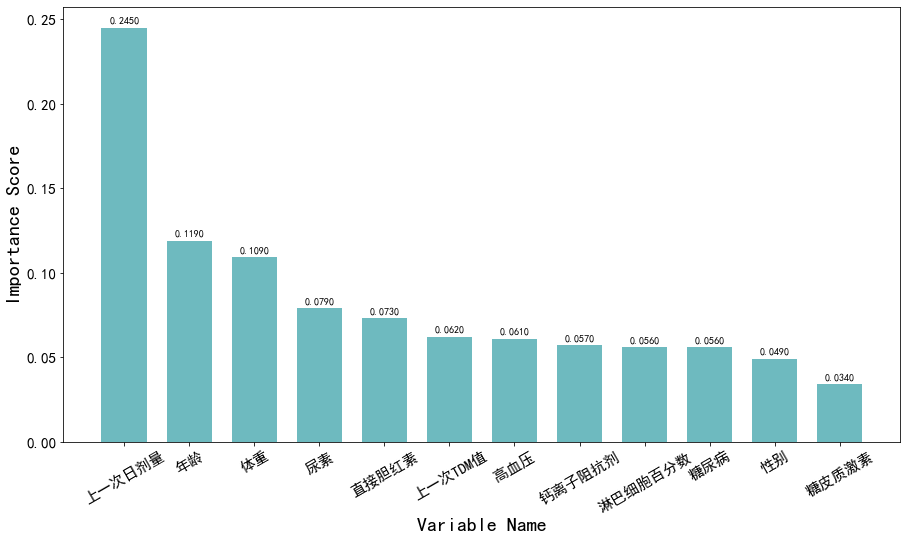

In [432]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  ##绘图显示中文
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc

names = df_importance['特征']
index = np.arange(len(names))
plt.figure(figsize=(15, 8))
plt.bar(df_importance['特征'], df_importance['重要性评分'], width=0.7,
        color=(0.42941176470588235, 0.7294117647058823, 0.7490196078431373), tick_label=names)
# 设置坐标刻度值的大小
plt.tick_params(labelsize=15)
plt.xticks(rotation=30)

plt.ylabel('Importance Score',fontsize=20)
plt.xlabel('Variable Name',fontsize=20)
for a, b in zip(index, df_importance['重要性评分']):
    plt.text(a, b + 0.002, '%.4f' % b, ha='center', va='bottom', fontsize=10)
# plt.title('重要变量得分柱形图')
# plt.show()

### 散点图

In [51]:
# 判断文件路径是否存在，如果不存在则创建该路径
def mkdir(path):
    folder = os.path.exists(path)
    if not folder:  # 判断是否存在文件夹如果不存在则创建为文件夹
        os.makedirs(path)  # makedirs 创建文件时如果路径不存在会创建这个路径

In [ ]:
# 画图
print('-----------------------画图---------------------------')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  ##绘图显示中文
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc
rc('mathtext', default='regular')

# 散点图
# axis设置坐标轴的范围
# plt.axis([-20, 20, 0, 200])
# x为x轴中坐标x的值，y为y轴中坐标y的值，x与y都是长度相同的数组序列，color为点的颜色，marker为散点的形状，
# 折线图刻度调小，要不然点都堆到一块了
ax = plt.gca()
ax.set_xlim(0,10)
ax.set_ylim(0,10)
# plt.scatter(range(len(test_y)),test_y,c='r')
plt.scatter(test_y,predictions,c='b')
# 红色参照线
plt.plot(list(range(test_y.shape[0])), list(range(test_y.shape[0])),color='r')
# plt.plot(list(range(30)), list(range(30)),color='r')
plt.xlabel('Number of Events(unit)')
plt.ylabel('MTX Bone Suppression')

In [52]:
# plt.show()
# 判断图片保存路径是否存在，否则创建
jpg_path = project_path + "/jpg"
mkdir(jpg_path)
plt.savefig(jpg_path + "/他克莫司血药浓度测试集散点图v2.0.jpg", dpi=300)
plt.clf()  # 删除前面所画的图

-----------------------画图---------------------------


<Figure size 432x288 with 0 Axes>

### AUC曲线

In [56]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  ##绘图显示中文
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc

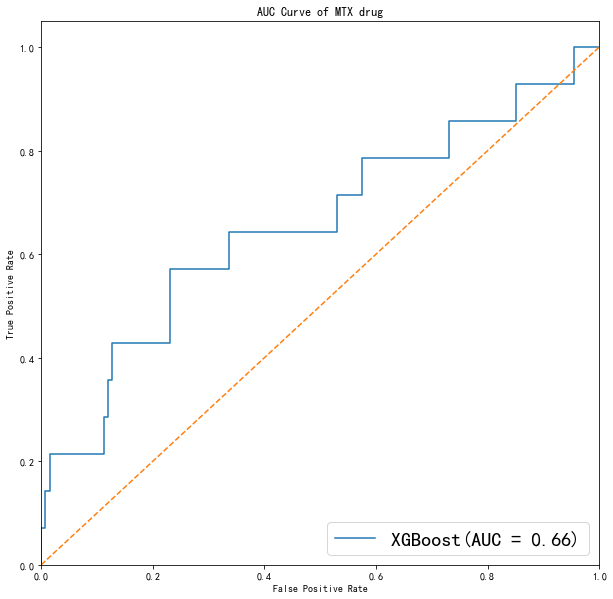

In [87]:
plt.figure(figsize=(10,10))

# plt.plot(logistic_fpr, logistic_tpr,label='LogisticRegression(AUC = %0.2f)' % logistic_auc) 
# plt.plot(rf_fpr, rf_tpr,label='RandomForest(AUC = %0.2f)' % rf_auc) 
plt.plot(xgb_fpr, xgb_tpr,label='XGBoost(AUC = %0.2f)' % xgb_auc) 
# plt.plot(ann_fpr, ann_tpr,label='ANN(AUC = %0.2f)' % ann_auc) 

plt.plot([0, 1], [0, 1],linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve of MTX drug')
plt.legend(loc="lower right", fontsize=20)
plt.show()

### precision曲线

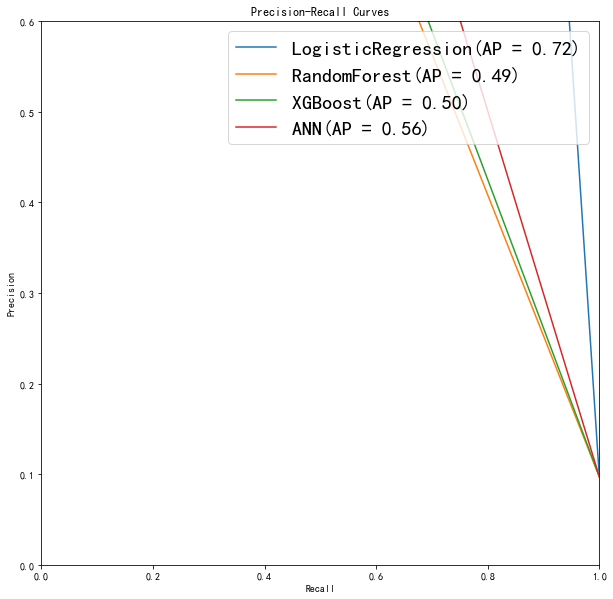

In [57]:
plt.figure(figsize=(10,10))

plt.plot(logistic_recall, logistic_precision, label='LogisticRegression(AP = %0.2f)' % logistic_ap)
plt.plot(rf_recall, rf_precision,label='RandomForest(AP = %0.2f)' % rf_ap) 
plt.plot(xgb_recall, xgb_precision,label='XGBoost(AP = %0.2f)' % xgb_ap) 
plt.plot(ann_recall, ann_precision,label='ANN(AP = %0.2f)' % ann_ap) 
         
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 0.6])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="upper right", fontsize=20)
plt.show()

### SHAP图

#### summary_plot

In [661]:
pd.value_counts(tran_y_sm)

0.0    108
1.0    108
Name: 日剂量, dtype: int64

In [297]:
# SHAP图
from pylab import mpl
from matplotlib import pyplot as plt
mpl.rcParams['font.sans-serif'] = ['SimHei']  ##绘图显示中文
mpl.rcParams['axes.unicode_minus'] = False
from matplotlib import rc
rc('mathtext', default='regular')

import catboost,xgboost
import shap
shap.initjs()  # notebook环境下，加载用于可视化的JS代码
# CatBoost模型
cat_model=xgboost.XGBClassifier(max_depth=5,
                        learning_rate=0.001,
                        n_estimators=500,
                        min_child_weight=0.5,
                        eta=0.1,
                        gamma=0.5,
                        reg_lambda=5,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        nthread=4,
                        scale_pos_weight=1,
                        random_state=3)
cat_model.fit(tran_x_sm, tran_y_sm)

explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(tran_x_sm)  # 传入特征矩阵X，计算SHAP值
# print(shap_values)

In [298]:
tran_x_sm=tran_x_sm.rename(columns={'日剂量':'上一次日剂量',
                                   'gender':'性别',
                                   'age':'年龄',
                                   'test_result':'上一次TDM值'})

In [941]:
?shap.summary_plot

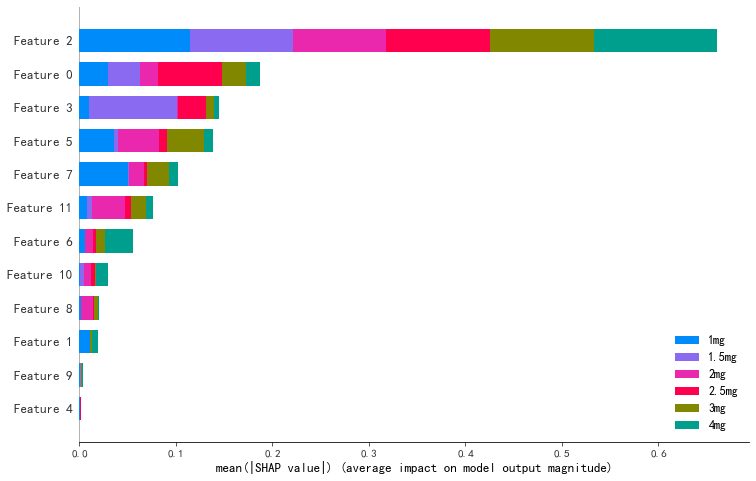

In [929]:
# summarize the effects of all the features
shap.summary_plot(shap_values, tran_x_sm,plot_size=(12,8),
                 class_names=['1mg','1.5mg','4mg','3mg','2.5mg','2mg'])

In [308]:
tran_x_sm.columns

Index(['体重', '钙离子阻抗剂', '上一次日剂量', '年龄', '糖尿病', '直接胆红素', '尿素', '淋巴细胞百分数', '高血压',
       '糖皮质激素', '性别', '上一次TDM值'],
      dtype='object')

In [320]:
type(shap_values)

list

In [666]:
df_shap_values

,0,1,2,3,4,5,6,label
0,3.333769,1.008152,0.988628,-0.071092,0.513993,-0.571060,-0.345089,1.0
1,-3.036667,0.556787,-0.042782,-0.244547,-1.502985,0.666590,-0.815771,0.0
2,-1.156161,1.305836,1.151194,0.457161,2.602305,-0.233718,-0.399447,1.0
3,-3.468739,-1.346333,-1.789265,-0.236250,-0.121771,-0.457438,-0.256855,0.0
4,6.506644,1.503949,-0.082385,0.171726,0.679662,1.065485,-0.120442,1.0
...,...,...,...,...,...,...,...,...
211,-3.600252,-1.580784,-0.314290,-0.153086,0.170325,0.124037,0.722369,0.0
212,-3.199505,0.303407,0.112323,-0.505899,-2.100364,-0.641356,-0.655191,0.0
213,-2.335317,-1.924601,-0.193261,-0.598222,0.712953,-0.463681,-0.873663,0.0
214,-3.077490,-0.876349,-0.247377,-0.402913,-1.704780,-0.386496,-0.755241,0.0


In [705]:
df_shap = pd.DataFrame(data={'features':shap_col,
                            'shap_pos':shap_pos_list,
                            'shap_neg':shap_neg_list})

In [706]:
df_shap

,features,shap_pos,shap_neg
0,VPA_TDM,82,134
1,P-LCR,123,93
2,PDW,116,100
3,Antipsychotic_drugs,98,118
4,Indirect_Bilirubin,131,85
5,PCV,94,122
6,Hb,65,151


In [708]:
df_shap.to_excel(project_path+'/data/result/df_shap.xlsx')

In [607]:
shap_list=[]
for i in range(df_shap_values.shape[1]-1):
    shap_value=df_shap_values.iloc[:,i].sum()
    shap_list.append(shap_value)
df_shap = pd.DataFrame(data={'features':tran_x_sm.columns,
                            'shap_value':shap_list})

In [609]:
df_shap_values.iloc[:,i]

0     -0.345089
1     -0.815771
2     -0.399447
3     -0.256855
4     -0.120442
         ...   
211    0.722369
212   -0.655191
213   -0.873663
214   -0.755241
215   -0.751668
Name: 6, Length: 216, dtype: float64

In [606]:
shap_list

[5.8572997963870295,
 -4.419375988914488,
 4.727170591923252,
 -7.676649352632006,
 10.724639449482003,
 8.021531210373883,
 8.82472834675256]

In [608]:
df_shap

,features,shap_value
0,test_result,-40.453473
1,大型血小板比值,36.070186
2,血小板分布宽度,-8.814643
3,血红蛋白测定,-0.772038
4,抗精神病药,12.686806
5,红细胞比积测定,1.033044
6,间接胆红素,0.250118


In [527]:
writer = pd.ExcelWriter(project_path + '/data/result/df_shap值排序.xlsx')
df_shap.to_excel(writer)
writer.save()

#### multioutput_decision_plot

In [942]:
?shap.multioutput_decision_plot

In [963]:
col=df_model.columns.to_list()
col.remove('target_日剂量')

In [964]:
col

['体重',
 '钙离子阻抗剂',
 '日剂量',
 'age',
 '糖尿病',
 '直接胆红素',
 '尿素',
 '淋巴细胞百分数',
 '高血压',
 '糖皮质激素',
 'gender',
 'test_result']

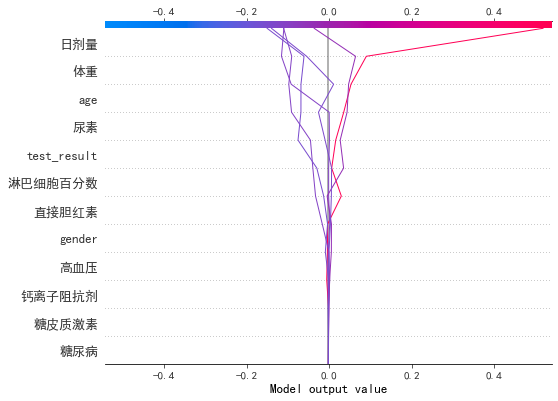

In [967]:
shap.multioutput_decision_plot(shap_values,shap_values,row_index=3,
                              feature_names=col)

In [935]:
shap_values

[array([[ 1.7884551e-02, -4.7067376e-03,  2.6966387e-01, ...,
         -1.2953198e-05,  5.6798651e-04, -3.8480440e-03],
        [-4.1816123e-02, -6.2801642e-03, -7.8413635e-02, ...,
         -2.7280410e-05, -1.8625727e-04, -8.1662061e-03],
        [ 3.9592050e-02,  9.0608848e-03,  2.9020017e-01, ...,
         -1.2953198e-05, -6.2250026e-04,  7.3326016e-03],
        ...,
        [ 2.5673578e-02, -1.4627557e-02, -6.8878576e-02, ...,
         -2.7280410e-05, -2.0426390e-04, -2.1328896e-02],
        [-4.1581895e-02,  1.0974685e-02, -7.5531624e-02, ...,
         -4.7779835e-05, -6.5903337e-04, -3.6281857e-03],
        [ 1.5059070e-02, -1.0826434e-02, -9.7172759e-02, ...,
         -4.7779835e-05,  8.0837111e-04, -7.6254238e-03]], dtype=float32),
 array([[ 0.0705109 ,  0.        ,  0.00364254, ..., -0.00032048,
          0.0028362 ,  0.00838457],
        [-0.04089006,  0.        , -0.08070022, ..., -0.00069359,
         -0.00989467, -0.00038218],
        [-0.01878903,  0.        ,  0.01004871

### 混淆矩阵图

In [323]:
from sklearn.metrics import classification_report,confusion_matrix
import catboost
# CatBoost模型
cat_model=xgboost.XGBClassifier(max_depth=5,
                        learning_rate=0.001,
                        n_estimators=500,
                        min_child_weight=0.5,
                        eta=0.1,
                        gamma=0.5,
                        reg_lambda=5,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        nthread=4,
                        scale_pos_weight=1,
                        random_state=3)

cat_model.fit(tran_x_sm,tran_y_sm)
cat_predictions=cat_model.predict(test_x)
# 计算混淆矩阵
cat_confusion=confusion_matrix(test_y,cat_predictions)

In [324]:
cat_confusion

array([[4, 0, 0, 0, 0, 0],
       [1, 4, 0, 0, 0, 0],
       [1, 0, 5, 0, 0, 0],
       [0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 4, 0],
       [0, 0, 1, 0, 0, 3]], dtype=int64)

0 0
0 1
0 2
0 3
0 4
0 5
1 0
1 1
1 2
1 3
1 4
1 5
2 0
2 1
2 2
2 3
2 4
2 5
3 0
3 1
3 2
3 3
3 4
3 5
4 0
4 1
4 2
4 3
4 4
4 5
5 0
5 1
5 2
5 3
5 4
5 5


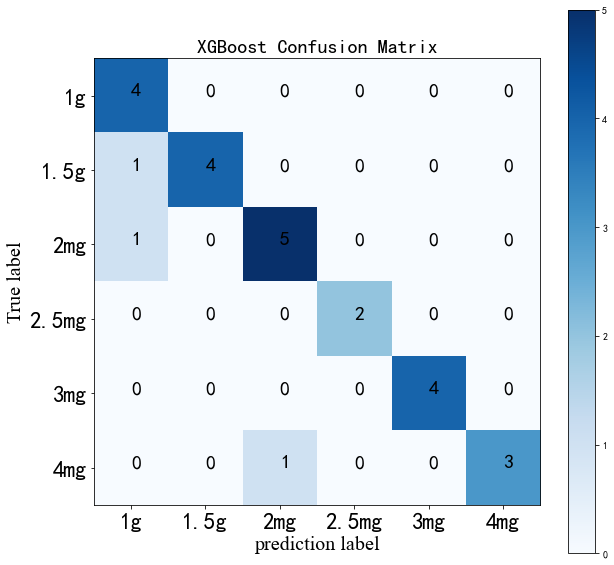

In [330]:
plt.figure(figsize=(10,10))
plt.imshow(cat_confusion, cmap=plt.cm.Blues) # 在特定的窗口上显示图像
# 设置图表标题
plt.title('XGBoost Confusion Matrix',size=20)    # 图像标题
plt.colorbar()
# 设置坐标轴标题
font_x = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 20,}
plt.xlabel('prediction label',font_x)
plt.ylabel('True label',font_x)
# 设置坐标轴刻度
plt.tick_params(labelsize=23)  # 设置刻度值大小
label_names=['1g','1.5g','2mg','2.5mg','3mg','4mg']
plt.xticks(range(len(label_names)),label_names)
plt.yticks(range(len(label_names)),label_names)
# 显示数据
for first_index in range(len(cat_confusion)):    #第几行
    for second_index in range(len(cat_confusion[first_index])):    #第几列
        print(first_index, second_index)
        plt.text(second_index,first_index, cat_confusion[first_index][second_index],size=20)
plt.show()

In [471]:
cat_confusion

array([[27,  0],
       [ 1,  5]], dtype=int64)

In [475]:
for first_index in range(len(cat_confusion)):    #第几行
    print(cat_confusion[first_index])
    break

[27  0]


In [476]:
for second_index in range(len(cat_confusion[first_index])):    #第几列
    print(cat_confusion[first_index][second_index])

27
0


0 0
27
0 1
0
1 0
1
1 1
5


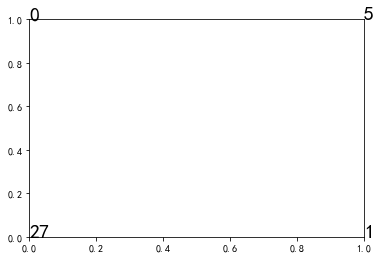

In [480]:
# 显示数据
for first_index in range(len(cat_confusion)):    #第几行
    for second_index in range(len(cat_confusion[first_index])):    #第几列
        print(first_index, second_index)
        print(cat_confusion[first_index][second_index])
        plt.text(first_index, second_index, cat_confusion[first_index][second_index],size=20)
plt.show()

### tabnet mask graph

In [299]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
TabNet_model = TabNetClassifier()  #TabNetRegressor()
tran_x_x, tran_x_valid, tran_y_y, tran_y_valid = train_test_split(tran_x_sm, tran_y_sm, test_size=0.1, random_state=3)

TabNet_model.fit(X_train=tran_x_x.to_numpy(),  
        y_train=tran_y_y.to_numpy(), 
        eval_set=[(tran_x_valid.to_numpy(), tran_y_valid.to_numpy())], 
        eval_name=['train'], 
        eval_metric=['auc'],
        max_epochs=100,
        patience=15,
        batch_size=128,
        virtual_batch_size=15,
        num_workers=0,
        drop_last=False)

Device used : cpu
epoch 0  | loss: 0.75528 | train_auc: 0.63881 |  0:00:00s
epoch 1  | loss: 0.59836 | train_auc: 0.92063 |  0:00:00s
epoch 2  | loss: 0.56821 | train_auc: 0.91119 |  0:00:00s
epoch 3  | loss: 0.50365 | train_auc: 0.96853 |  0:00:01s
epoch 4  | loss: 0.45512 | train_auc: 0.94126 |  0:00:01s
epoch 5  | loss: 0.41852 | train_auc: 0.92727 |  0:00:01s
epoch 6  | loss: 0.43255 | train_auc: 0.94441 |  0:00:01s
epoch 7  | loss: 0.40222 | train_auc: 0.94545 |  0:00:02s
epoch 8  | loss: 0.36702 | train_auc: 0.91993 |  0:00:02s
epoch 9  | loss: 0.35444 | train_auc: 0.96294 |  0:00:02s
epoch 10 | loss: 0.36125 | train_auc: 0.97343 |  0:00:02s
epoch 11 | loss: 0.3187  | train_auc: 0.97203 |  0:00:02s
epoch 12 | loss: 0.28125 | train_auc: 0.97098 |  0:00:03s
epoch 13 | loss: 0.2984  | train_auc: 0.98427 |  0:00:03s
epoch 14 | loss: 0.27376 | train_auc: 0.98147 |  0:00:03s
epoch 15 | loss: 0.23633 | train_auc: 0.97028 |  0:00:03s
epoch 16 | loss: 0.24844 | train_auc: 0.97063 |  0:00:

In [211]:
explain_matrix,masks=TabNet_model.explain(tran_x_sm.to_numpy())

AttributeError: 'CatBoostClassifier' object has no attribute 'explain'

NameError: name 'explain_matrix' is not defined

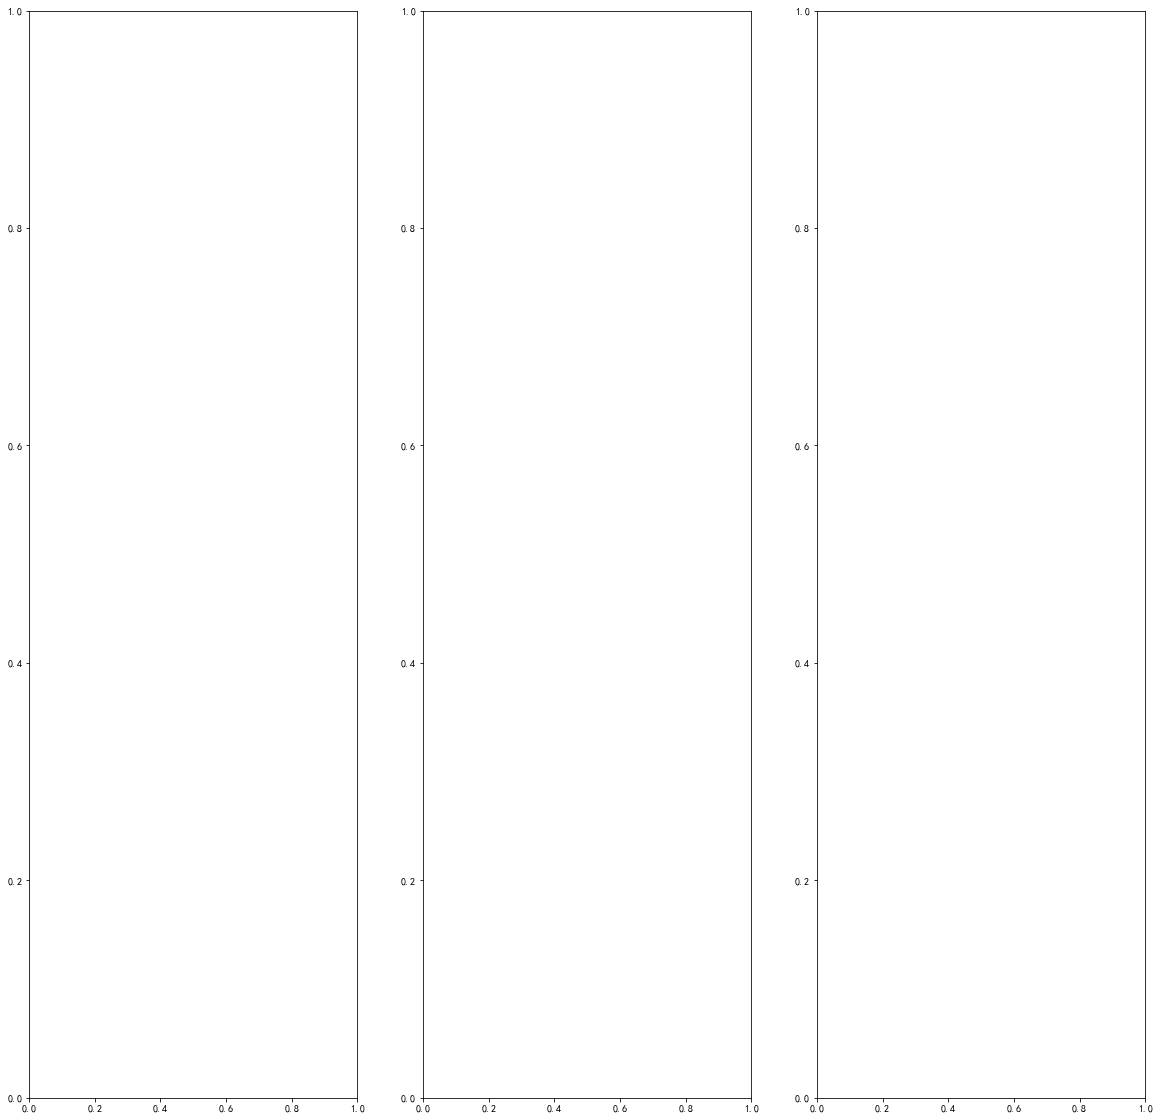

In [212]:
from matplotlib import pyplot as plt
# fig = plt.figure(figsize=(40,40))
# ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# plt.yticks(np.arange(0, len(explain_matrix), 1.0))
# plt.xticks(np.arange(0, len(explain_matrix[0]), 1.0))
# ax.set_xticklabels(tran_x_sm.columns, rotation=75)
# plt.ylabel('Sample Number')
# plt.xlabel('Variable')
# # plt.imshow(explain_matrix[:30])  # 显示30个

fig, axs = plt.subplots(1, 3, figsize=(20,20))
for i in range(3):
    axs[i].set_yticks(np.arange(0, len(explain_matrix), 1.0))  # 设置左边间距
    axs[i].set_xticks(np.arange(0, len(explain_matrix[0]), 2.0))
    axs[i].set_ylabel('Sample Number',size=20)
    axs[i].set_xlabel('Variable',size=20)
    # 设置坐标刻度值的大小
    axs[i].tick_params(labelsize=15)
    axs[i].imshow(masks[i][:30])
    axs[i].set_title(f"mask {i}")
    axs[i].set_xticklabels(tran_x_sm.columns[::2], rotation=90)

In [351]:
tran_x_sm.columns

Index(['单核细胞绝对值', '异甘草酸镁', '谷草转氨酶(干式)', '甘草酸苷', '单核细胞百分比', '淋巴细胞百分比',
       '乳酸脱氢酶(干式)', '托烷司琼', '中性细胞绝对值', '嗜酸性细胞绝对值', '谷胱甘肽', '红细胞', '嗜酸性细胞百分比',
       '多烯磷脂酰', '嗜碱性细胞百分比', 'age', 'gender', 'RBC平均容量', 'MTX_tdm_72h',
       '白蛋白(干式)', '中性细胞百分比', 'MTX_tdm_48h', '总蛋白(干式)', '淋巴细胞绝对值', '吸烟史',
       '肌酐(干式)', 'MTX_tdm_24h', '日剂量', '长春新碱', 'RBC血红浓度'],
      dtype='object')